## Sentimental analysis

## Table of content
- [1 Webscrapping](#1Webscrapping)
- [2 look at the data](#2lookatthedata)
- [2.1 Stemmer and lematize](#2.1Stemmerandlematize)
- [3 Analyzing words](#3Analyzingwords)
    - [3.1 Analyzing words with SentimentIntensityAnalyzer](#3.1AnalyzingwordswithSentimentIntensityAnalyzer)
        - [3.1.1 Most common words](#3.1.1Mostcommonwords)
    - [3.2 Analysing using Textblob](#3.2AnalysingusingTextblob)
        - [3.2.1 Most common words](#3.2.1Mostcommonwords)
- [Testing Accuracy](#TestingAccuracy)
    - [Training Data and Test Data CountVectorizer](#TrainingDataandTestDataCountVectorizer)
    - [Training Data and Test Data TfidfVectorizer](#TrainingDataandTestDataTfidfVectorizer)
    - [Example handle inbalance data](#Examplehandleinbalancedata)    
- [4 Train and Test CV](#4TrainandTestCV)
- [5 Compare model](#5Comparemodel)
    - [1 logistic regression](#1logisticregression)
    - [2 naive bayes classifier](#2naivebayesclassifier)

In [1]:
# plotting modules
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score

%config InlineBackend.figure_format ='retina'
#import pandas_profiling
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.linear_model import SGDRegressor, SGDClassifier,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
#import graphlab
#import turicreate
#from surprise import SVD
#from surprise import Dataset
#from surprise.model_selection import cross_validate
#import Recommenders as Recommenders
import lifetimes
import xgboost
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
#from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict

import requests
from bs4 import BeautifulSoup


In [15]:
import sys
print (sys.version)
#source activate py27
#conda activate py36
#conda deactivate
#conda info --envs
#https://stackoverflow.com/questions/30492623/using-both-python-2-x-and-python-3-x-in-ipython-notebook

3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## 1 Web scrapping
<a id='1Webscrapping'></a>

In [16]:
page = 1
url = 'https://www.productreview.com.au/p/showpo/' + str(page) + '.html'

#reponse
page = requests.get(url)
#A variável page é atribuída a um objeto Response:
print ("page granted",page)
print ('page status', page.status_code)

page granted <Response [200]>
page status 200


In [1]:
#soup = BeautifulSoup(page.text, 'html.parser')
#print(soup.prettify())

In [18]:
#number of page
print ('length of page',soup.find(itemprop="ratingCount").get_text())

length of page 2834


In [19]:
#try
tagsReview = soup.find_all(class_='review-overall',itemprop='description')
comments = [tag.text for tag in tagsReview]
comments[:3]

['\n    I had two sets of credit on two different accounts and the girls have been helping me the last few days getting it sorted. The clothes are always great quality and it’s always so quick to get there. \r\nWill always buy clothes from Showpo and recommend them from anyone\n',
 "\n    Always fast delivery, Always great clothing. Any issues i've ever had they have fixed within 48 hours. i use them religiously :)\n",
 '\n    I bought 4 dresses on Afterpay. 2 fit and I was happy with, 2 didn’t (one generally didn’t fit all over, the other too tight around the waist and bust which was already a size bigger than I’d normally order - not good for self esteem). I returned said 2 and received store credit (annoying but ok..) and  ordered the next size up in the tight waist and bust dress and a different top. Dress was too big in the bust and too small in the waist, top fit but gaped where the buttons closed at the front. I returned both. Learnt by this point that I needed to avoid fitted d

In [20]:
#empty dictionary to store comment
names = []
date=[]
comments = []
rating = []

#start from page one
pagenr = 1
print(pagenr)
url = 'https://www.productreview.com.au/p/showpo/' + str(pagenr) + '.html'
page = requests.get(url)

soup = BeautifulSoup(page.text, 'html.parser')
nr_ratings = int(soup.find(itemprop="ratingCount").get_text())


#nr_ratings = 1
while len(comments)< nr_ratings:
    url = 'https://www.productreview.com.au/p/showpo/' + str(pagenr) + '.html'
    page = requests.get(url)

    soup = BeautifulSoup(page.text, 'html.parser')

    #--------------author-----------#
    tagsName = soup.find_all(itemprop='author')
    for tag in tagsName:
        names.append(tag.text.strip())
    #--------------rating-----------#
    tagsrating = soup.find_all(itemprop='reviewRating')
    for tag in tagsrating:
        rating.append(tag.text.strip())
            
    tagsdate = soup.find_all(class_='rating-md')
    for tag in tagsdate:
        date.append(tag.text.strip("u' \n\n\n\n1 out of 5,\n            \n\n\n        ").strip('reviewed on '))
    
     #--------------review-----------#
    tagsReview = soup.find_all(class_='review-overall',itemprop='description')
    for tag in tagsReview:
        comments.append(tag.text.strip())
        
    pagenr += 1
    print(pagenr,len(comments))

1
2 20
3 40
4 60
5 80
6 100
7 120
8 140
9 160
10 180
11 200
12 220
13 240
14 260
15 280
16 300
17 320
18 340
19 360
20 380
21 400
22 420
23 440
24 460
25 480
26 500
27 520
28 540
29 560
30 580
31 600
32 620
33 640
34 660
35 680
36 700
37 720
38 740
39 760
40 780
41 800
42 820
43 840
44 860
45 880
46 900
47 920
48 940
49 960
50 980
51 1000
52 1020
53 1040
54 1060
55 1080
56 1100
57 1120
58 1140
59 1160
60 1180
61 1200
62 1220
63 1240
64 1260
65 1280
66 1300
67 1320
68 1340
69 1360
70 1380
71 1400
72 1420
73 1440
74 1460
75 1480
76 1500
77 1520
78 1540
79 1560
80 1580
81 1600
82 1620
83 1640
84 1660
85 1680
86 1700
87 1720
88 1740
89 1760
90 1780
91 1800
92 1820
93 1840
94 1860
95 1880
96 1900
97 1920
98 1940
99 1960
100 1980
101 2000
102 2020
103 2040
104 2060
105 2080
106 2100
107 2120
108 2140
109 2160
110 2180
111 2200
112 2220
113 2240
114 2260
115 2280
116 2300
117 2320
118 2340
119 2360
120 2380
121 2400
122 2420
123 2440
124 2460
125 2480
126 2500
127 2520
128 2540
129 2560
130 2

In [21]:
import pandas as pd
df = pd.DataFrame(data = {'names':names,'date':date,'comments':comments,'rating':rating})
df['brand']= 'showpo'
df.head()

names                                               date  \
0       Nic                                       Dec 11, 2018   
1    Lauren                                       Dec 11, 2018   
2      Tess  3 out of 5,\n            \n\n\n        reviewe...   
3     Laura  4 out of 5,\n            \n\n\n        reviewe...   
4  Haley H.  4 out of 5,\n            \n\n\n        reviewe...   

                                            comments       rating   brand  
0  I had two sets of credit on two different acco...  5 out of 5,  showpo  
1  Always fast delivery, Always great clothing. A...  5 out of 5,  showpo  
2  I bought 4 dresses on Afterpay. 2 fit and I wa...  3 out of 5,  showpo  
3  I love this store, but... I'm a larger size an...  4 out of 5,  showpo  
4  I was so excited to receive this product and I...  4 out of 5,  showpo

In [22]:
#df.to_csv('showpo.csv', encoding="utf-8")

## 2 Look at the data
<a id='2lookatthedata'></a>

In [2]:
ozsale = pd.read_csv('ozsale.csv', index_col=False,encoding="utf-8")
#showpo = pd.read_csv('showpo.csv', index_col=False,encoding="utf-8")
#iconic = pd.read_csv('iconic.csv', index_col=False,encoding="utf-8")
#popcherry = pd.read_csv('popcherry.csv', index_col=False,encoding="utf-8")
#yesstyle = pd.read_csv('yesstyle.csv', index_col=False,encoding="utf-8")

frames = [ozsale]#, showpo, iconic,popcherry,yesstyle

combines = pd.concat(frames)
#reset index
combine = combines.reset_index(drop=True)

In [3]:
combine.tail(2)

Unnamed: 0                                           comments  \
11312       11312  If you have money to give away to people who d...   
11313       11313  Customer Service shocking - try another group ...   

               date           names       rating   brand  
11312  Nov 15, 2010            mn79  1 out of 5,  ozsale  
11313  Nov 12, 2010  hellsbells2024  1 out of 5,  ozsale

In [4]:
#clean columns
combine['rating'] = combine.apply(lambda x: x['rating'][:-10], axis = 1)
#delete columns
combine_clean=combine.drop(['Unnamed: 0'], axis=1)

In [5]:
ozsale=combine_clean[combine_clean['brand'].str.contains("ozsale")]
showpo=combine_clean[combine_clean['brand'].str.contains("showpo")]
iconic=combine_clean[combine_clean['brand'].str.contains("iconic")]
popcherry=combine_clean[combine_clean['brand'].str.contains("popcherry")]
yesstyle=combine_clean[combine_clean['brand'].str.contains("yesstyle")]

ozsale['brand_class']= 1
showpo['brand_class']= 2
iconic['brand_class']= 3
popcherry['brand_class']= 4
yesstyle['brand_class']= 5

In [6]:
# change type
combine[['rating']] = combine[['rating']].astype(float)
#showpo[['rating']] = showpo[['rating']].astype(float)
#iconic[['rating']] = iconic[['rating']].astype(float)
#popcherry[['rating']] = popcherry[['rating']].astype(float)
#yesstyle[['rating']] = yesstyle[['rating']].astype(float)

print (combine.shape)
#print (showpo.shape)
#print (iconic.shape)
#print (popcherry.shape)
#print (yesstyle.shape)


(11314, 6)


In [7]:
#all_brand = ozsale.append([ozsale, showpo,iconic,yesstyle,popcherry])
#all_brands = all_brand.reset_index(drop=False)
#all_brands.head(2)

In [8]:
#check how many missing
print('Is there missing data on the dataset? {}'.format( combine.isin(['-']).sum().any()))
print('How many missing data? {}'.format( combine.isin(['-']).sum().sum()))
print("")
all_brand= combine.copy()
#looking duplicate
#print('check description duplicate data', ozsale.comments.duplicated().sum())
#print('check description duplicate data', showpo.comments.duplicated().sum())
#print('check description duplicate data', iconic.comments.duplicated().sum())
#print('check description duplicate data', popcherry.comments.duplicated().sum())
#print('check description duplicate data', yesstyle.comments.duplicated().sum())
#print('check description duplicate data', iconic.comments.duplicated().sum())

Is there missing data on the dataset? False
How many missing data? 0



In [9]:
def unique_counts(all_brand):
    for i in all_brand.columns:
        count = all_brand[i].nunique()
        print(i, ": ", count)
unique_counts(all_brand)

Unnamed: 0 :  11314
comments :  11308
date :  1801
names :  7807
rating :  5
brand :  1


In [10]:
all_brand.shape

(11314, 6)

In [11]:
#looking duplicate
print('check description duplicate data', all_brand.comments.duplicated().sum())
all_brand=all_brand.drop_duplicates(['comments'], keep='last')
all_brand.shape

check description duplicate data 6


(11308, 6)

In [12]:
def word_count(sentence):
    return len(sentence.split())
all_brand['word count'] = all_brand['comments'].apply(word_count)
all_brand["Character Count"] = all_brand['comments'].apply(len)

In [13]:
all_brand.head(2)

Unnamed: 0                                           comments  \
0           0  At a time when our experiences with customer s...   
1           1  It was easy to browse through and you have a w...   

           date    names  rating   brand  word count  Character Count  
0  Nov 04, 2018  Natalie     5.0  ozsale         132              713  
1  Nov 04, 2018    Ginny     5.0  ozsale          32              176

#### 2.1 EDA

In [14]:
five=all_brand[all_brand.rating==5.0]
four=all_brand[all_brand.rating==4.0]
three=all_brand[all_brand.rating==3.0]
two=all_brand[all_brand.rating==2.0]
one=all_brand[all_brand.rating==1.0]
print('number of five rating tagged sentences is:  {}'.format(len(five.comments)))
print('number of four rating tagged sentences is: {}'.format(len(four.comments)))
print('number of three rating tagged sentences is: {}'.format(len(three.comments)))
print('number of two rating tagged sentences is: {}'.format(len(two.comments)))
print('number of one rating tagged sentences is: {}'.format(len(one.comments)))
print('total length of the data is: {}'.format(len(all_brand.comments)))

number of five rating tagged sentences is:  5897
number of four rating tagged sentences is: 3102
number of three rating tagged sentences is: 440
number of two rating tagged sentences is: 267
number of one rating tagged sentences is: 1602
total length of the data is: 11308



Total Word Count is: 601309
Total Character Count is: 3328746


count        mean         std   min    25%    50%    75%  \
word count       11308.0   53.175539   55.275896   3.0   24.0   34.0   60.0   
Character Count  11308.0  294.370888  300.492197  22.0  138.0  190.0  332.0   

                    max  
word count       1413.0  
Character Count  7801.0

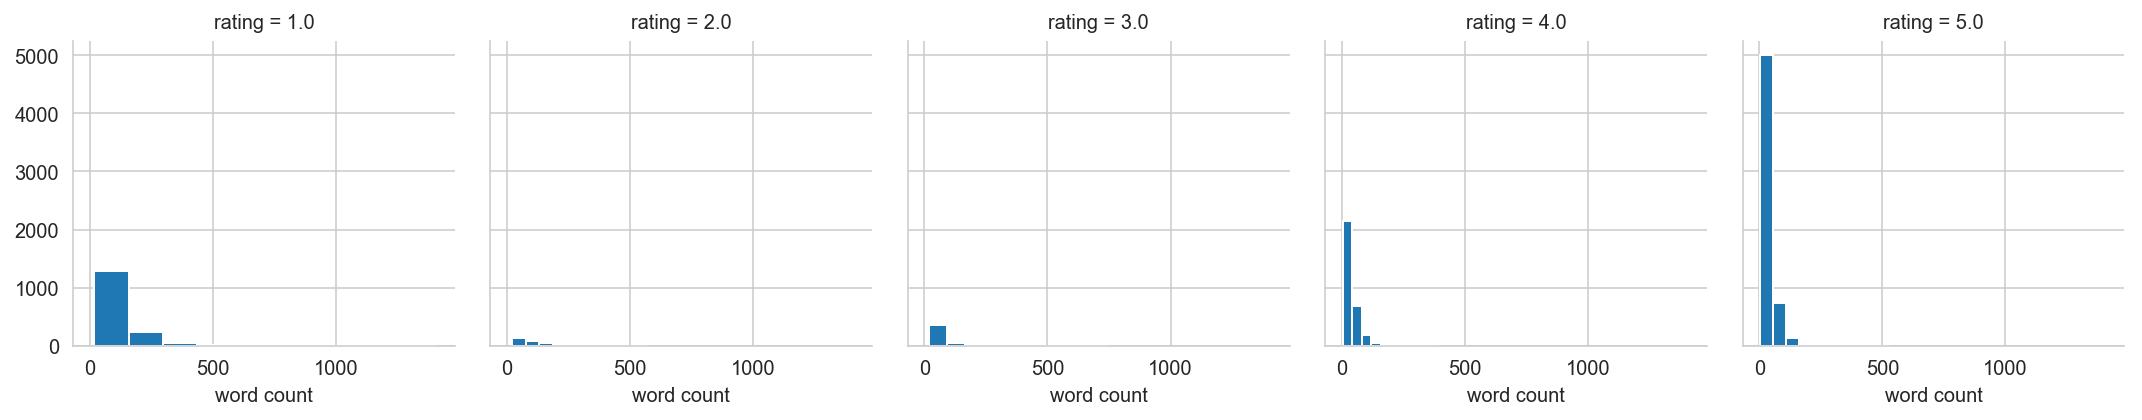

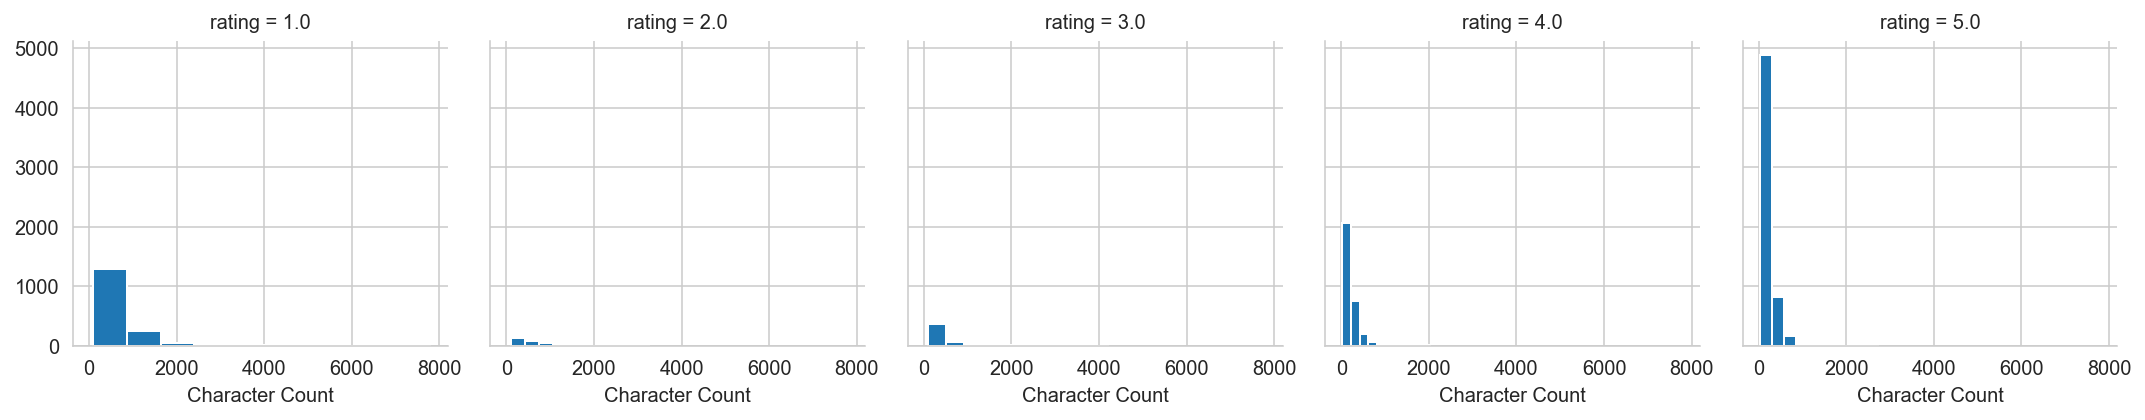

In [15]:
g = sns.FacetGrid(data=all_brand, col='rating')
g.map(plt.hist, 'word count', bins=10)

g = sns.FacetGrid(data=all_brand, col='rating')
g.map(plt.hist, 'Character Count', bins=10)

print("\nTotal Word Count is: {}".format(all_brand["word count"].sum()))
print("Total Character Count is: {}".format(all_brand["Character Count"].sum()))
all_brand[["word count","Character Count"]].describe().T

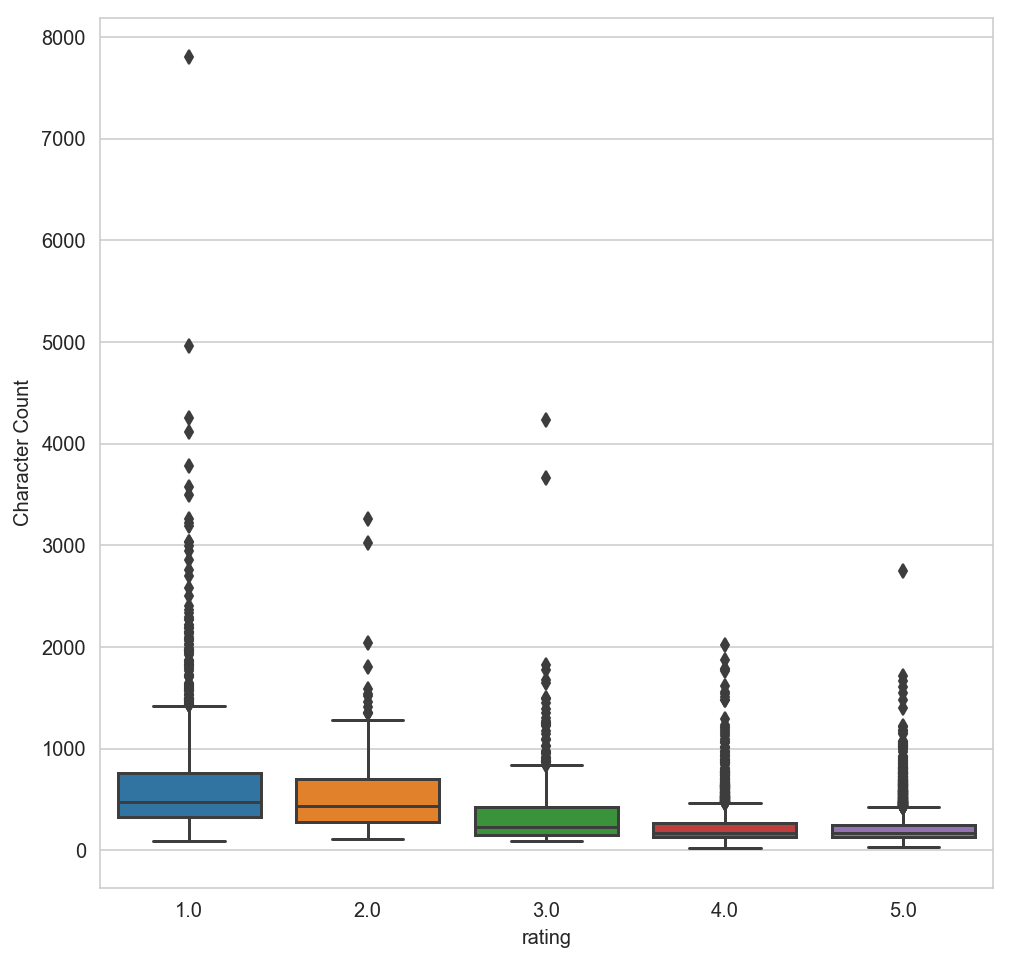

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(x='rating', y='Character Count', data=all_brand)

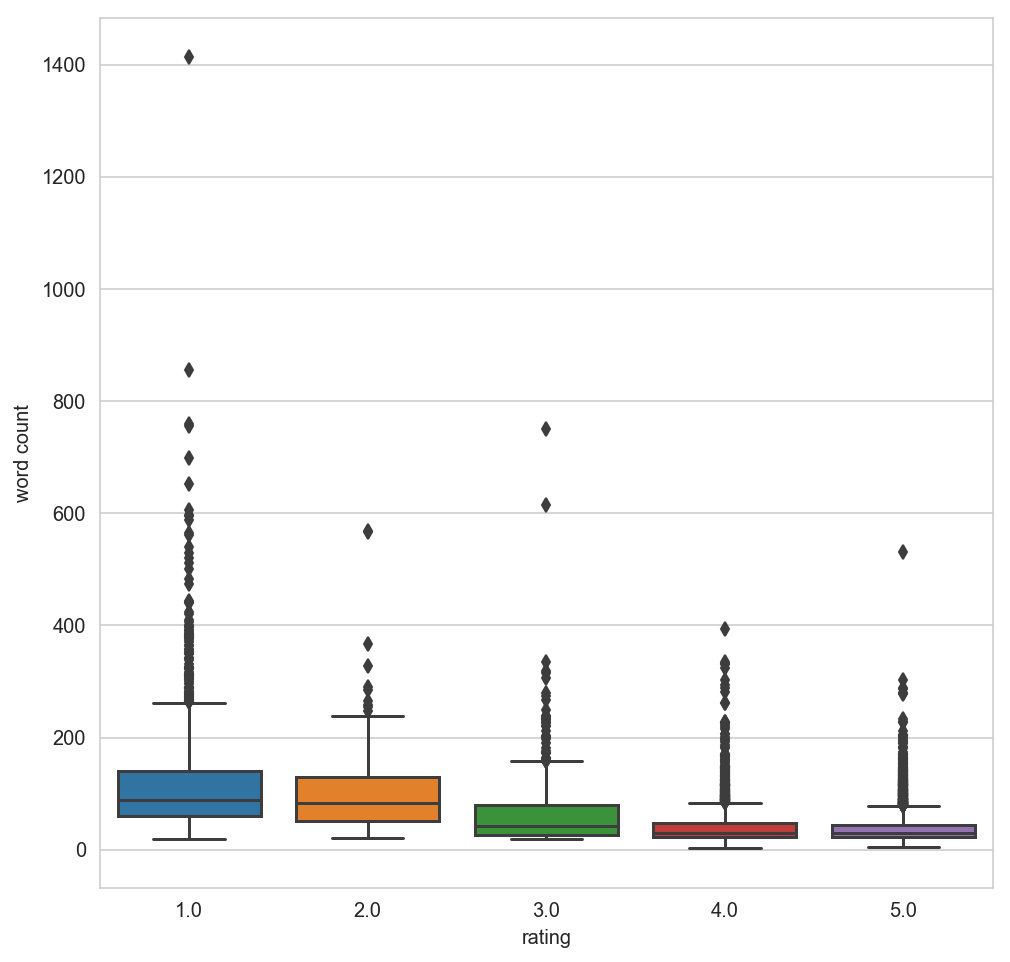

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x='rating', y='word count', data=all_brand)

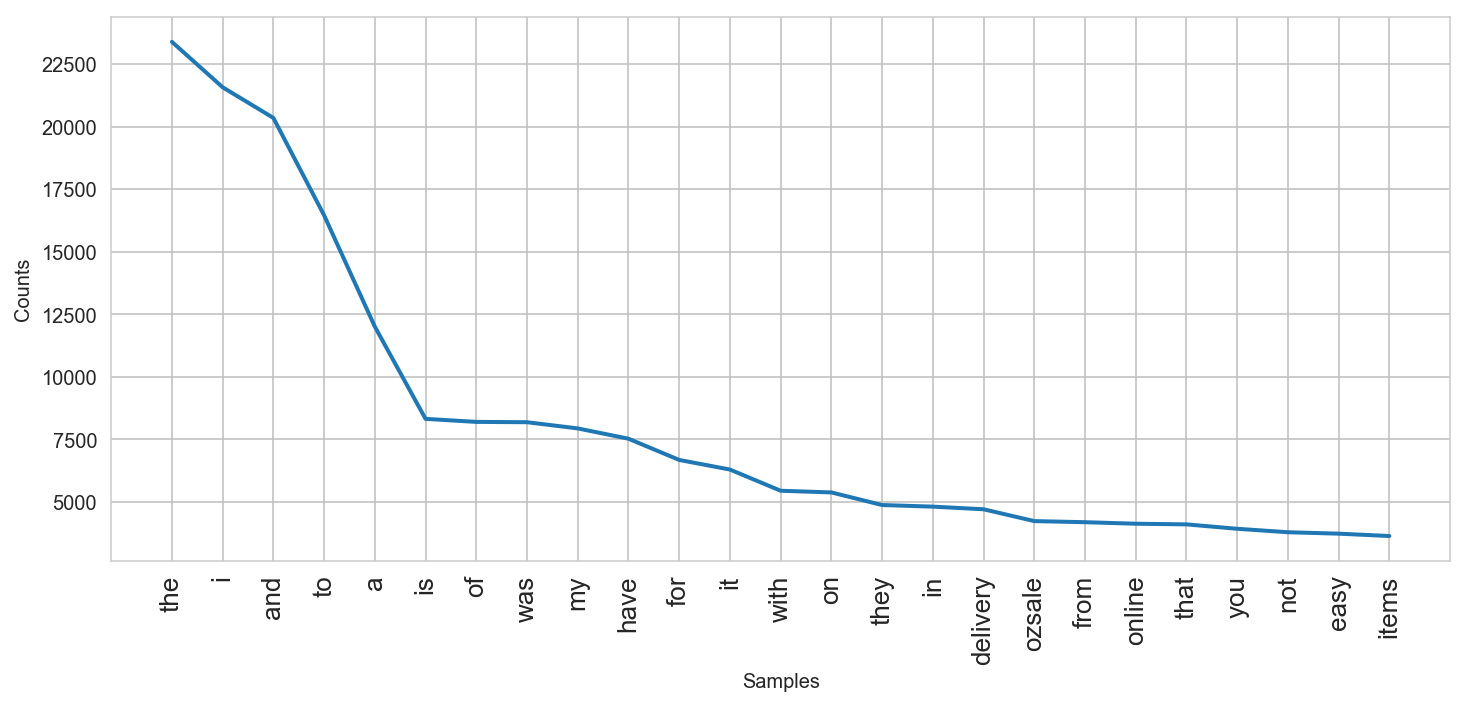

In [18]:
# most common words in dataset
all_words = []
for line in list(all_brand['comments']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

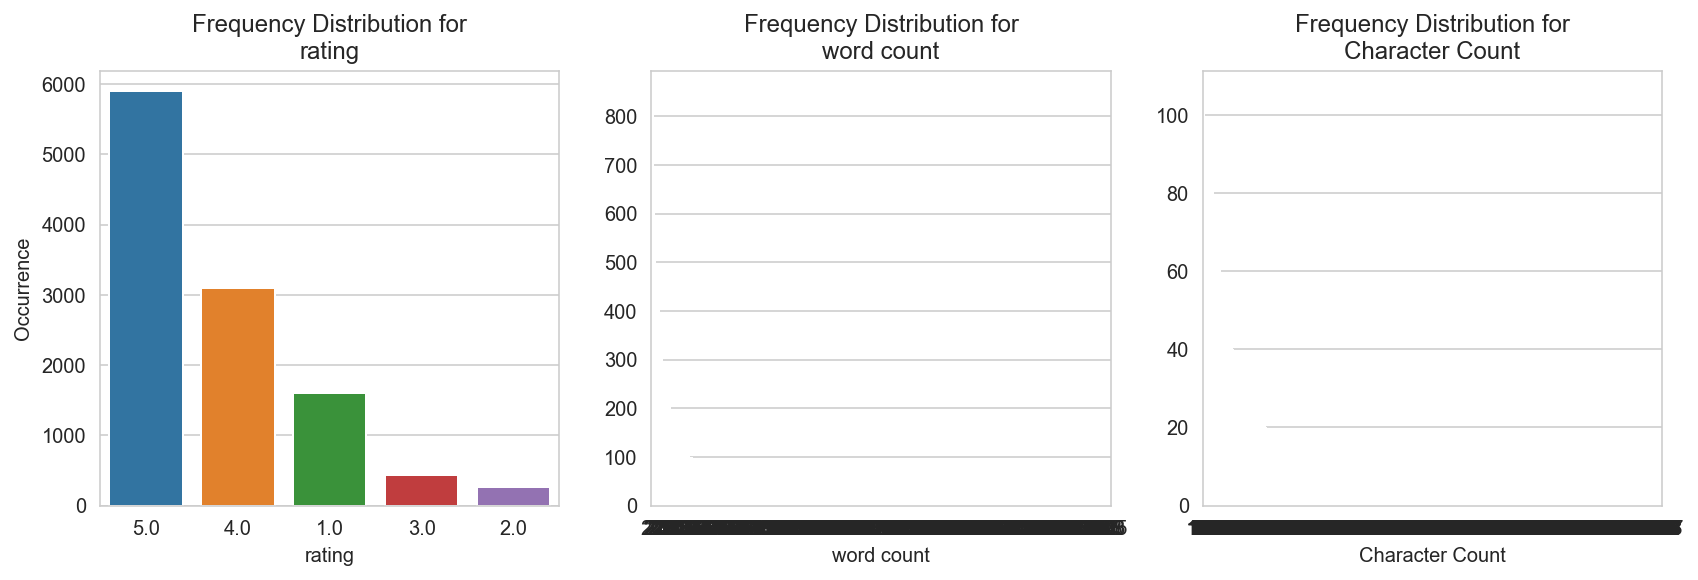

In [19]:
#cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
cat_dtypes = ["rating","word count", "Character Count"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=all_brand,order=all_brand[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

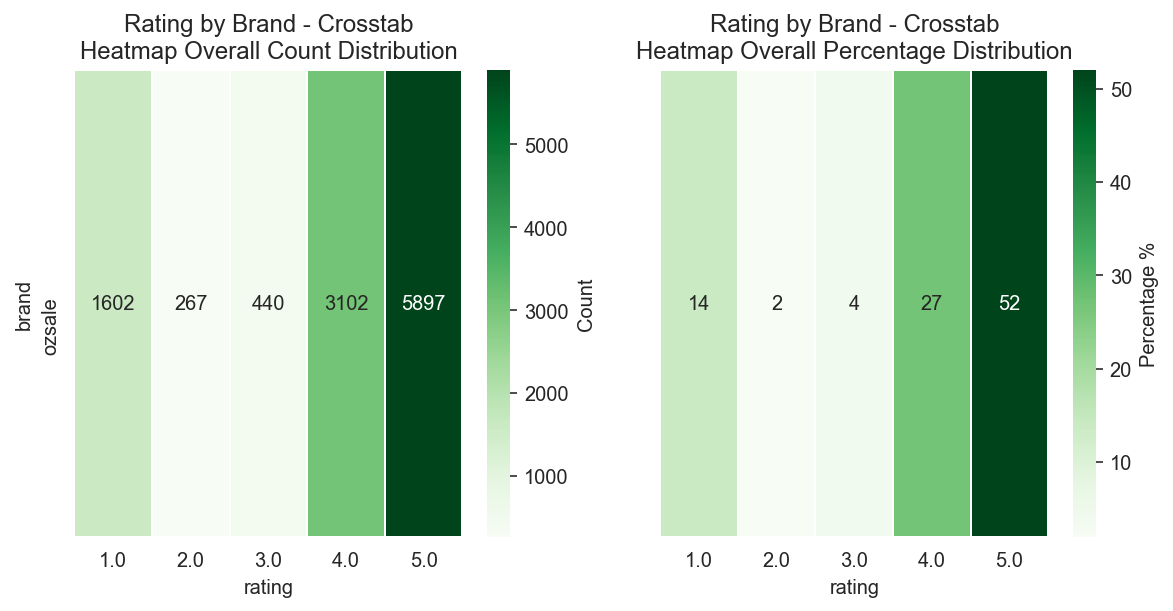

In [20]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(8, 4), sharey=True)
sns.heatmap(pd.crosstab(all_brand['brand'], all_brand["rating"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Rating by Brand - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(all_brand['brand'], all_brand["rating"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Rating by Brand - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

## 2.1 Pre-processing : cleaning, stemming and lematize
<a id='2.1Stemmerandlematize'></a>
#### stop-words
After removing stop-words we split all the sentences in the dataset to get individual words (tokens) which is basically a list of words per sentence contained in the newly processed tweet. Now we can see that we have two new columns in the dataframe that contains these tokenized versions of a review.

#### word cloud
I have also created a word cloud depicting the most common words in the entire  dataset after normalization.

#### stemming and lemmatizing
There are additional normalization techniques like stemming and lemmatizing that we can try on our data but comment are short by design and the above methods may not work so well because they essentially shorten words to their base words. e.g.: running to run.


In [1]:
#cleaning
#function for tokenizing summary
regEx = re.compile('[^a-z]+/')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

all_brand["summaryClean"] =all_brand["comments"].apply(cleanReviews);

In [22]:
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer,PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
def lemmatize_word(words):
    lemma=WordNetLemmatizer()
    words = word_tokenize(words)
    lemma_list=[]
    for w in words:
        lemma_list.append(lemma.lemmatize(w))
    return (" ".join(lemma_list))

def stem_word(words):
    stem=PorterStemmer()
    words = word_tokenize(words)
    stem_list=[]
    for w in words:
        stem_list.append(stem.stem(w))
    return (" ".join(stem_list))

def stem_and_lemma(words):
    new_article=lemmatize_word(words)
    new_article=stem_word(words)
    return new_article
    
#    stemmer = PorterStemmer()
#    stemmer = SnowballStemmer("english")
#    lancaster_stemmer = LancasterStemmer()
#    wordnet_lemmatizer = WordNetLemmatizer()

all_brand['stem_summaryClean']=all_brand.summaryClean.apply(lambda x : stem_word(x))
all_brand['stem_and_lemma_summaryClean']=all_brand.summaryClean.apply(lambda x : stem_and_lemma(x))
all_brand['lemmatize_word_summaryClean']=all_brand.summaryClean.apply(lambda x : lemmatize_word(x))

In [24]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['ozsale','iconic','...','“','”','’','…','showpo','yesstyle','popcherry', '/','2019','u2019']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
all_brand_clean = all_brand.copy()
all_brand_clean['tokens'] = all_brand_clean['lemmatize_word_summaryClean'].apply(text_process) # tokenize style 1
all_brand_clean['token_clean'] = all_brand_clean['tokens'].apply(remove_words) #tokenize style 2

In [25]:
#convert list
token_strings_list = []
for brand in all_brand_clean['token_clean']:
    token_string = ''
    for token in brand:
        token_string += token + ' '
    token_string = token_string[:-1]
    token_strings_list.append(token_string)

token_strings_list

#token_clean_ser = pd.Series(token_strings_list)

all_brand_clean['token_clean_new2'] = token_strings_list

In [26]:
#cleaning
all_brand_clean.replace(inplace=True,to_replace="\u2019",value=" ")
all_brand_clean.replace(inplace=True,to_replace="\u2019s",value=" ")
all_brand_clean['token_clean_new2'] = all_brand_clean['token_clean_new2'].str.strip("\u2019")
all_brand_clean.replace('2019', '');

In [27]:
all_brand_clean.token_clean_new2.iloc[0]

'time experience customer service tend towards negative refreshing come across business actually know treat customer well buying since inception fault incorrect item sent purchase lost transit whole gamut thing go wrong buying online every time happened ha handled quickly manner favourable customer everyone ha treated well company surprised still around today continuing buy encourage anyone give try one good one'

In [28]:
all_brand_clean.head(2)

Unnamed: 0                                           comments  \
0           0  At a time when our experiences with customer s...   
1           1  It was easy to browse through and you have a w...   

           date    names  rating   brand  word count  Character Count  \
0  Nov 04, 2018  Natalie     5.0  ozsale         132              713   
1  Nov 04, 2018    Ginny     5.0  ozsale          32              176   

                                        summaryClean  \
0  at a time when our experiences with customer s...   
1  it was easy to browse through and you have a w...   

                                   stem_summaryClean  \
0  at a time when our experi with custom servic t...   
1  it wa easi to brows through and you have a wid...   

                         stem_and_lemma_summaryClean  \
0  at a time when our experi with custom servic t...   
1  it wa easi to brows through and you have a wid...   

                         lemmatize_word_summaryClean  \
0  at a time when our experience with customer se...   
1  it wa easy to browse through and you have a wi...   

                                              tokens  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                         token_clean  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                    token_clean_new2  
0  time experience customer service tend towards ...  
1  wa easy browse wide range product wish footwea...

## 3 Analyzing words
<a id='3Analyzingwords'></a>
<a id='3.1AnalyzingwordswithSentimentIntensityAnalyzer'></a>
#### 3.1 Analyzing words with SentimentIntensityAnalyzer
sentiment analysis is a difficult problem, i will use a built-in analyzer in the nltk

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in all_brand_clean['token_clean_new2'].values[:4]:
    display(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print()

/anaconda3/envs/py36/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


'time experience customer service tend towards negative refreshing come across business actually know treat customer well buying since inception fault incorrect item sent purchase lost transit whole gamut thing go wrong buying online every time happened ha handled quickly manner favourable customer everyone ha treated well company surprised still around today continuing buy encourage anyone give try one good one'

compound: 0.7184, 
neg: 0.148, 
neu: 0.603, 
pos: 0.249, 



'wa easy browse wide range product wish footwear larger size comment quality nt received order yet'

compound: 0.6808, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 



'wrong stock arriving broken due poor packaging stained clothing questionable conduct ignore email dont read email dont answer phone busy frustrating ignoring alienating customer seems mott opp'

compound: -0.9559, 
neg: 0.495, 
neu: 0.505, 
pos: 0.0, 



'order arrived broken missing vital part send message account waiting reply far long basically send box junk ignore never buying'

compound: -0.6808, 
neg: 0.3, 
neu: 0.615, 
pos: 0.085, 



In [30]:
import sys
SIA = SentimentIntensityAnalyzer()
all_brand_clean["token_clean_new2"]= all_brand_clean["token_clean_new2"].astype(str)

# Applying Model, Variable all_brand
all_brand_clean['Polarity Score']=all_brand_clean["token_clean_new2"].apply(lambda x:SIA.polarity_scores(x)['compound'])
all_brand_clean['Neutral Score']=all_brand_clean["token_clean_new2"].apply(lambda x:SIA.polarity_scores(x)['neu'])
all_brand_clean['Negative Score']=all_brand_clean["token_clean_new2"].apply(lambda x:SIA.polarity_scores(x)['neg'])
all_brand_clean['Positive Score']=all_brand_clean["token_clean_new2"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
all_brand_clean['Sentiment']=''
all_brand_clean.loc[all_brand_clean['Polarity Score']>0,'Sentiment']='Positive'
all_brand_clean.loc[all_brand_clean['Polarity Score']==0,'Sentiment']='Neutral'
all_brand_clean.loc[all_brand_clean['Polarity Score']<0,'Sentiment']='Negative'
all_brand_clean.head(2)

#compound
all_brand_clean['label'] = 0
all_brand_clean.loc[all_brand_clean['Polarity Score'] > 0.2, 'label'] = 1
all_brand_clean.loc[all_brand_clean['Polarity Score'] < -0.2, 'label'] = -1

#We will consider posts with a compound value greater than 0.2 as positive 
#and less than -0.2 as negative. There's some testing and experimentation 
#that goes with choosing these ranges, and there is a trade-off to be made
#here. If you choose a higher value, you might get more compact results 
#(less false positives and false negatives), but the size of the results 
#will decrease significantly.

In [31]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

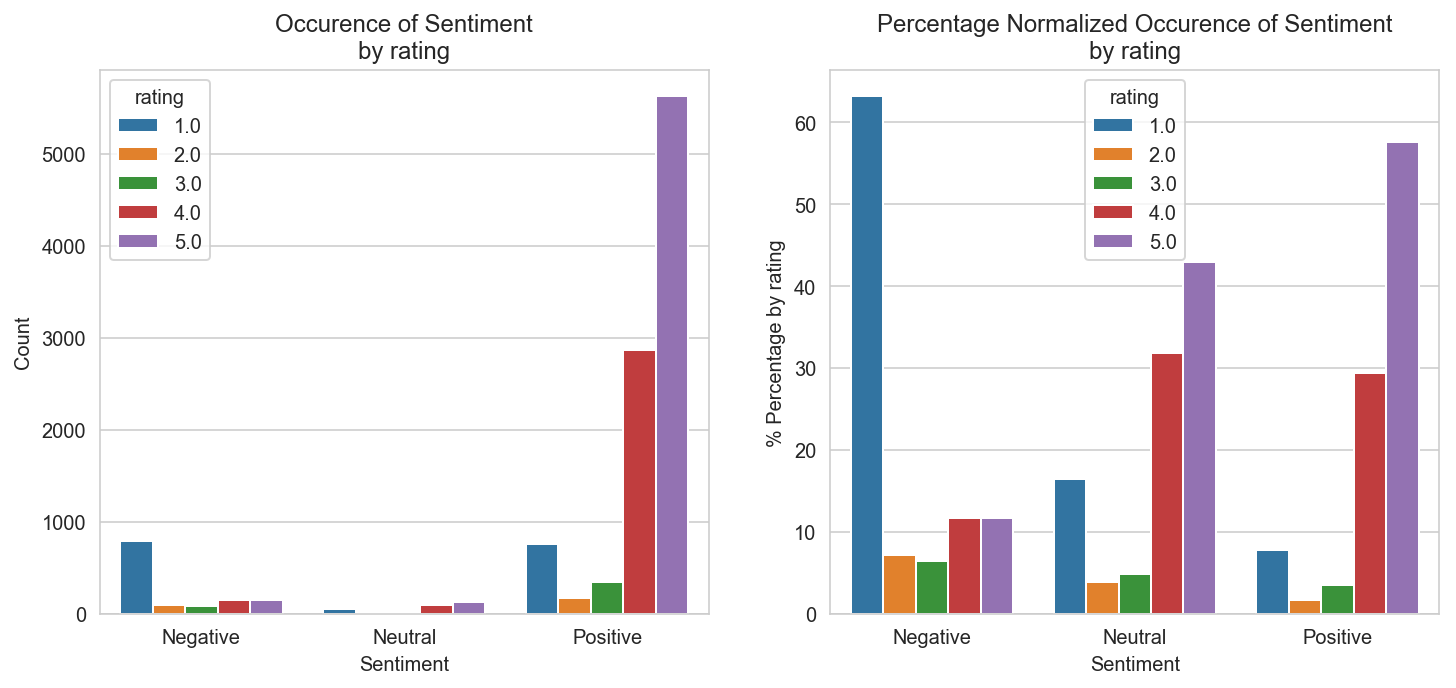

In [32]:
huevar = "rating"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=all_brand_clean, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=all_brand_clean, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

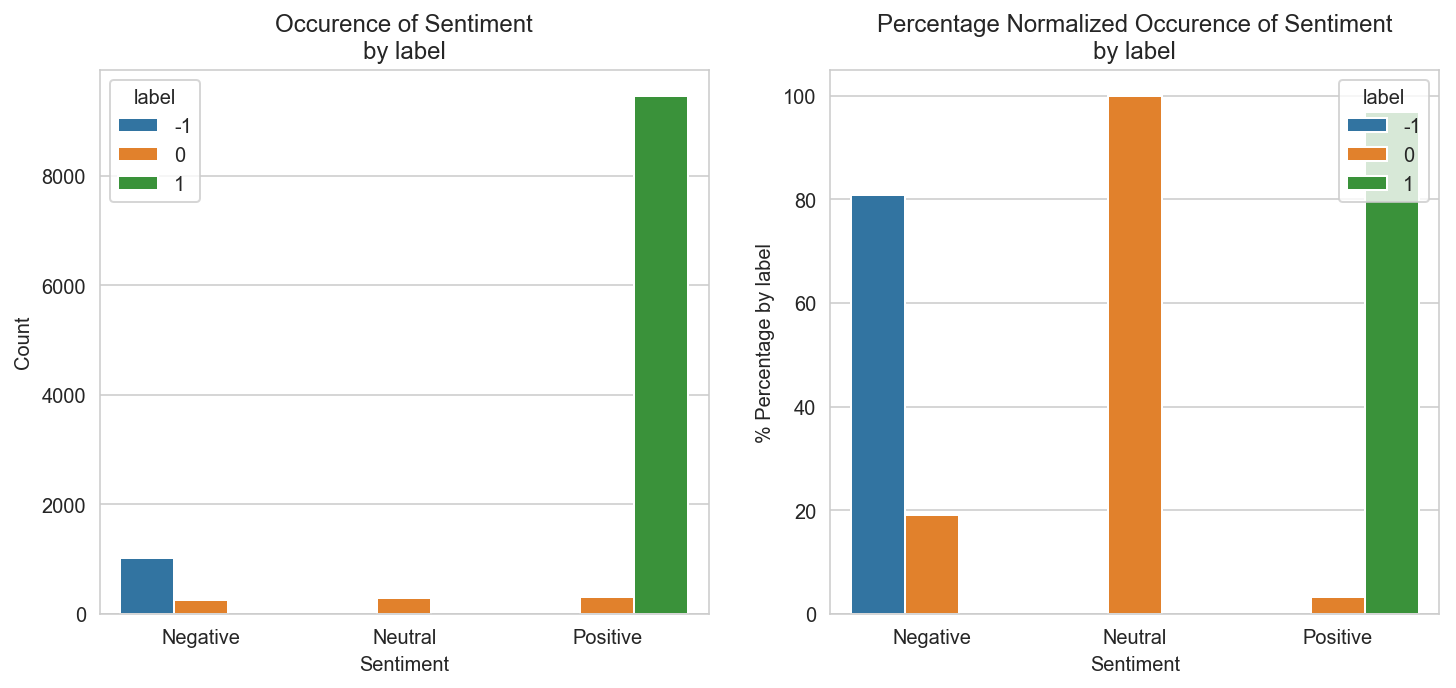

In [33]:
huevar = "label"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=all_brand_clean, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=all_brand_clean, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

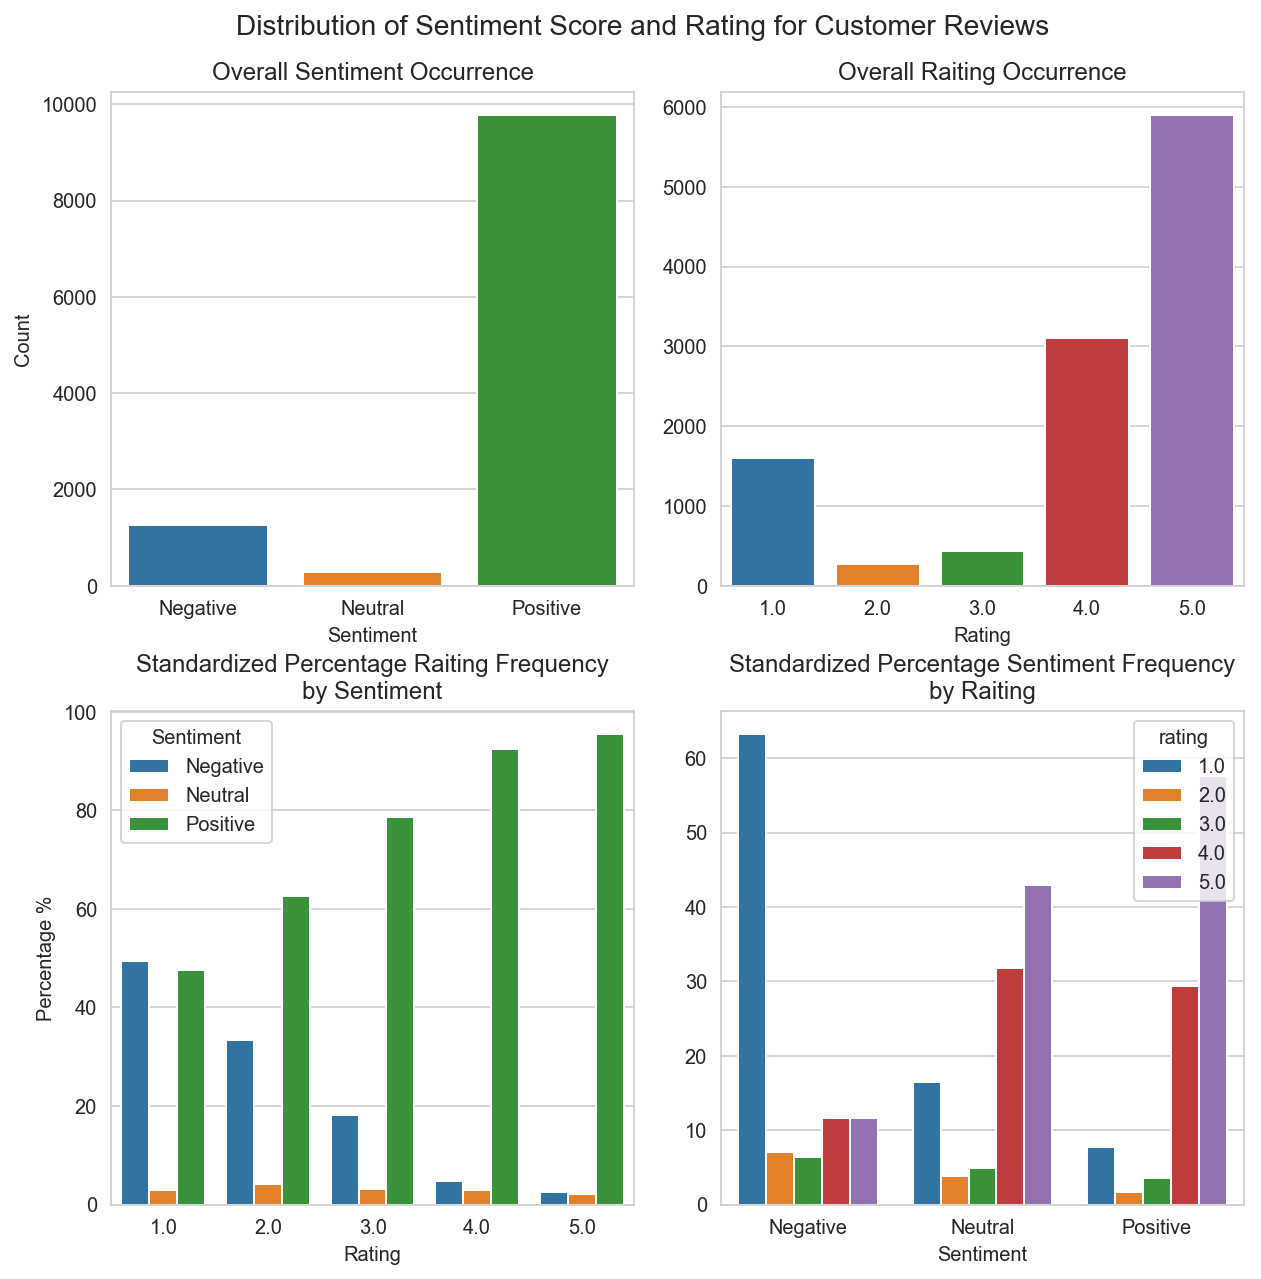

In [34]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=all_brand_clean, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="rating", data=all_brand_clean, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="rating",y="Percentage",hue="Sentiment",data=all_brand_clean, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="rating",data=all_brand_clean, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

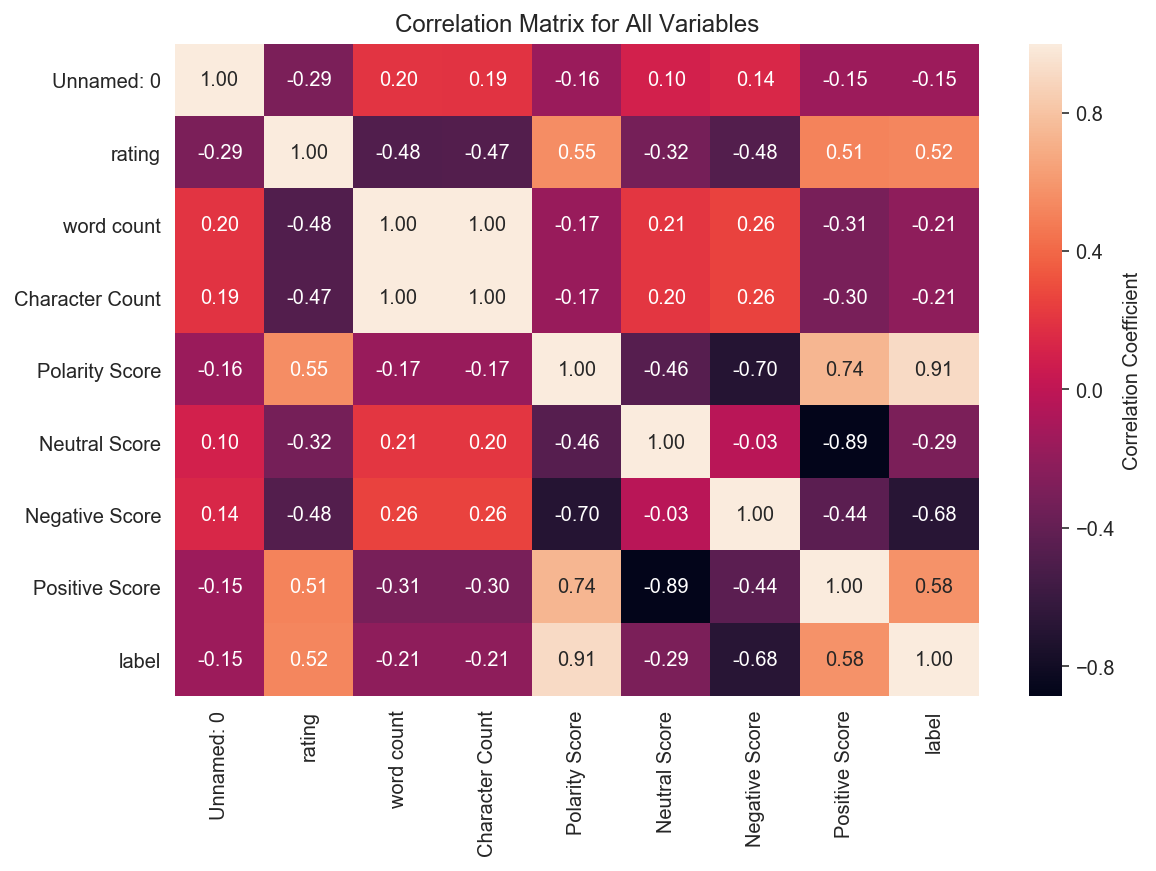

In [35]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(all_brand_clean.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()


In [36]:
# Snippet from:
# http://h6o6.com/2012/12/detecting-language-with-python-and-the-natural-language-toolkit-nltk/

from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [37]:
print(all_brand_clean.token_clean_new2.iloc[1000])
print (all_brand_clean['Polarity Score'].iloc[1000])
print (all_brand_clean['Neutral Score'].iloc[1000])
print (all_brand_clean['Positive Score'].iloc[1000])
print (all_brand_clean['Negative Score'].iloc[1000])

purchase made online easy process check pay delivery wa satisfactory wa always aware tracking process
0.6124
0.638
0.287
0.074


In [38]:
print (all_brand_clean.token_clean_new2.iloc[299])
print (all_brand_clean['Polarity Score'].iloc[299])
print (all_brand_clean['Neutral Score'].iloc[299])
print (all_brand_clean['Positive Score'].iloc[299])
print (all_brand_clean['Negative Score'].iloc[299])

brought large storage unit arrived damaged notified month later still resolved still refund left pocket removing damaged item poor communication poor service disappointed hundred pocket
-0.9246
0.531
0.047
0.422


index 19836 show dispointed of a customer but still count as neutrality and index 299 also big dispointment also count as neutrality, look like it doesnt do a good job in identifying this positive review 

In [39]:
all_brand_clean.head(2)

Unnamed: 0                                           comments  \
0           0  At a time when our experiences with customer s...   
1           1  It was easy to browse through and you have a w...   

           date    names  rating   brand  word count  Character Count  \
0  Nov 04, 2018  Natalie     5.0  ozsale         132              713   
1  Nov 04, 2018    Ginny     5.0  ozsale          32              176   

                                        summaryClean  \
0  at a time when our experiences with customer s...   
1  it was easy to browse through and you have a w...   

                                   stem_summaryClean  ...   \
0  at a time when our experi with custom servic t...  ...    
1  it wa easi to brows through and you have a wid...  ...    

                         lemmatize_word_summaryClean  \
0  at a time when our experience with customer se...   
1  it wa easy to browse through and you have a wi...   

                                              tokens  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                         token_clean  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                    token_clean_new2 Polarity Score  \
0  time experience customer service tend towards ...         0.7184   
1  wa easy browse wide range product wish footwea...         0.6808   

   Neutral Score  Negative Score  Positive Score  Sentiment label  
0          0.603           0.148           0.249   Positive     1  
1          0.714           0.000           0.286   Positive     1  

[2 rows x 21 columns]

In [40]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20]);

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [41]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [42]:
all_brand_clean.Sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

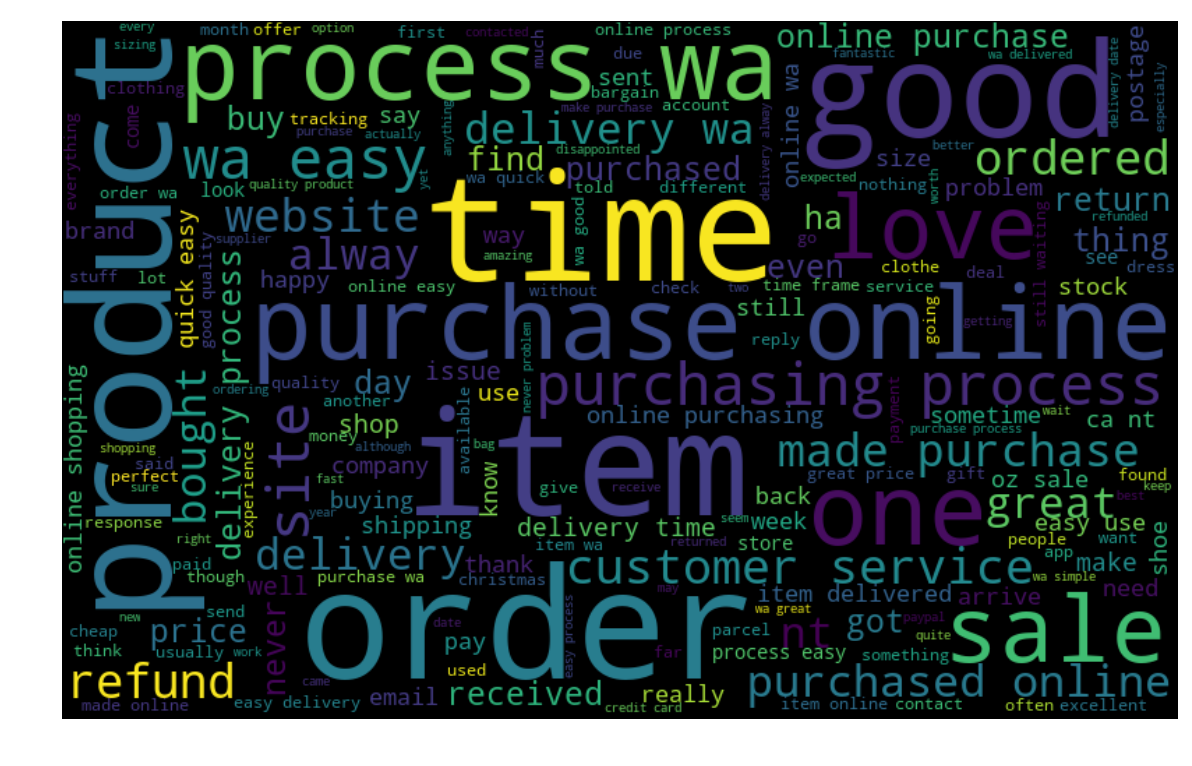

In [43]:
# Story Generation and Visualization from comments
#What are the most common words in the entire dataset?
all_words = ' '.join([text for text in all_brand_clean['token_clean_new2']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

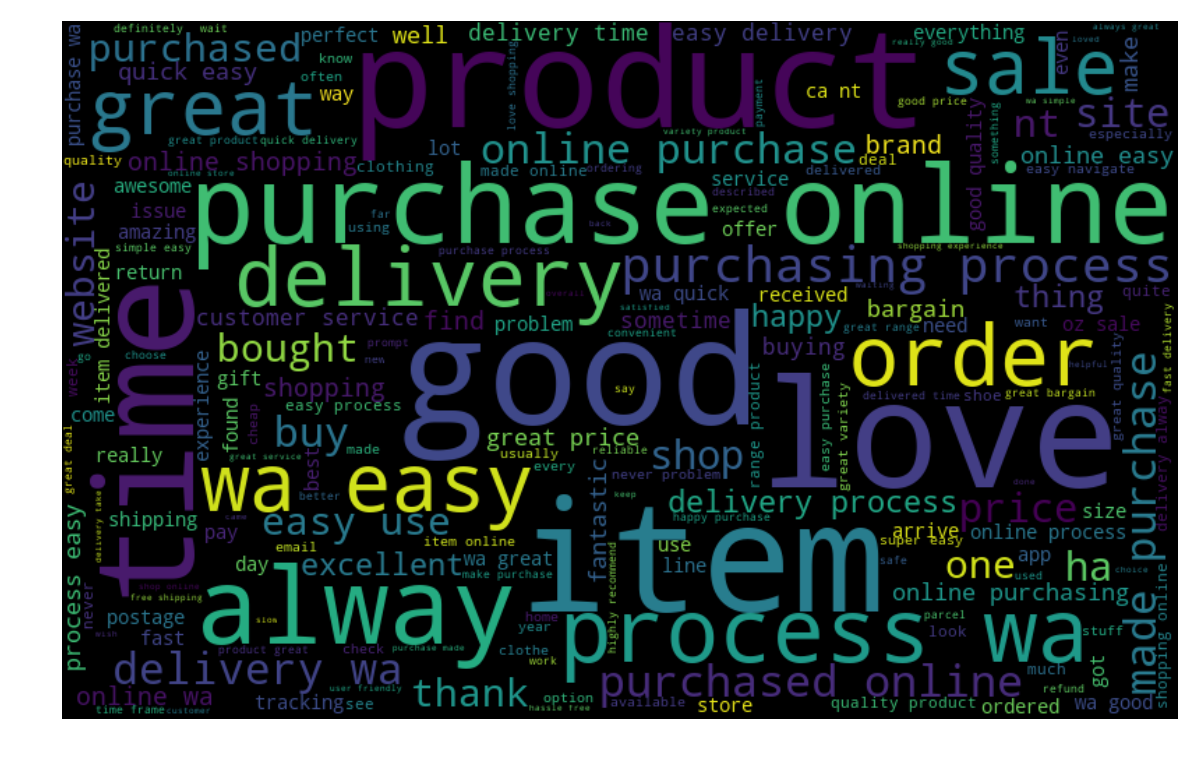

In [44]:
##positive word
normal_words =' '.join([text for text in all_brand_clean['token_clean_new2'][all_brand_clean['Positive Score'] >= 0.3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

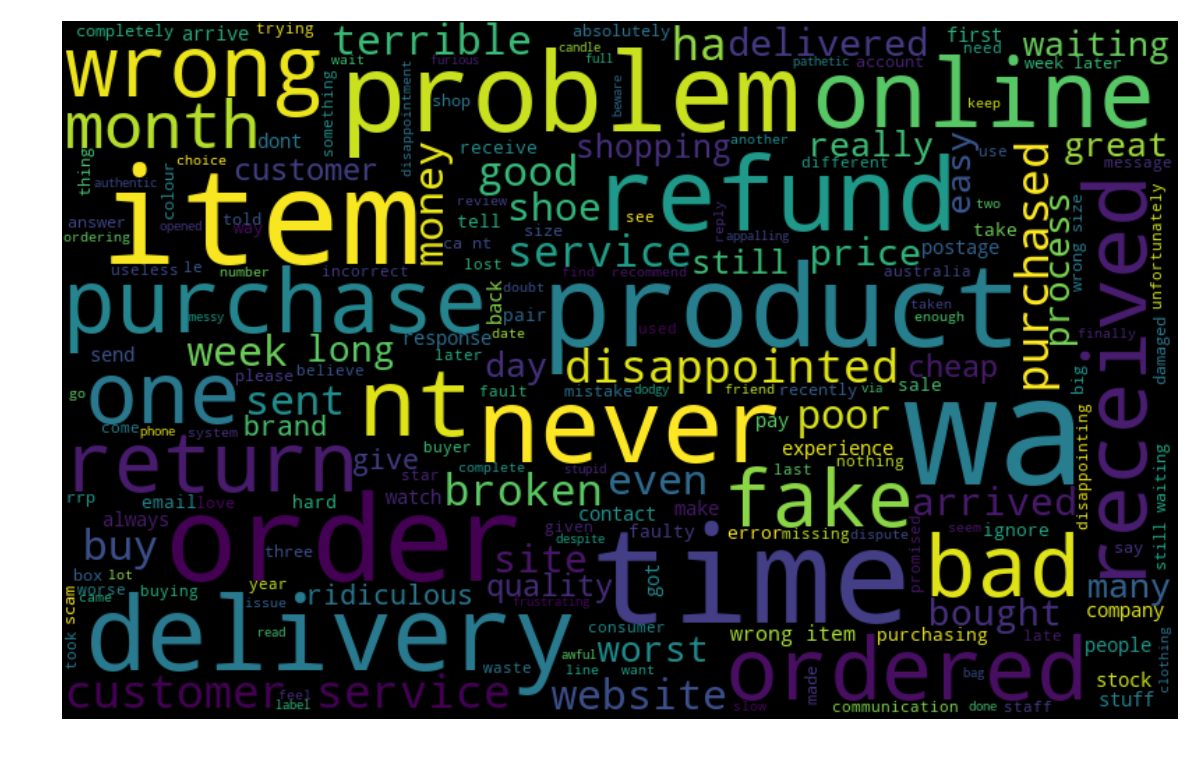

In [45]:
##negative word
normal_words =' '.join([text for text in all_brand_clean['token_clean_new2'][all_brand_clean['Negative Score'] >= 0.3]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### 3.1.1 Most common words
<a id='3.1.1Mostcommonwords'></a>

In [46]:
positive =all_brand_clean[all_brand_clean.label==1]
negative =all_brand_clean[all_brand_clean.label==-1]
word=all_brand_clean[['Sentiment','token_clean_new2']]
negative.head(2)
#stop_words=custom_stop_words

Unnamed: 0                                           comments  \
2           2  Wrong stock\r\nArriving broken due to poor pac...   
3           3  My order arrived broken AND missing vital part...   

           date          names  rating   brand  word count  Character Count  \
2  Nov 03, 2018  Upfront momma     1.0  ozsale          35              242   
3  Nov 01, 2018         E west     1.0  ozsale          48              237   

                                        summaryClean  \
2  wrong stock\r\narriving broken due to poor pac...   
3  my order arrived broken and missing vital part...   

                                   stem_summaryClean  ...   \
2  wrong stock arriv broken due to poor packag . ...  ...    
3  my order arriv broken and miss vital part . al...  ...    

                         lemmatize_word_summaryClean  \
2  wrong stock arriving broken due to poor packag...   
3  my order arrived broken and missing vital part...   

                                              tokens  \
2  [wrong, stock, arriving, broken, due, poor, pa...   
3  [order, arrived, broken, missing, vital, part,...   

                                         token_clean  \
2  [wrong, stock, arriving, broken, due, poor, pa...   
3  [order, arrived, broken, missing, vital, part,...   

                                    token_clean_new2 Polarity Score  \
2  wrong stock arriving broken due poor packaging...        -0.9559   
3  order arrived broken missing vital part send m...        -0.6808   

   Neutral Score  Negative Score  Positive Score  Sentiment label  
2          0.505           0.495           0.000   Negative    -1  
3          0.615           0.300           0.085   Negative    -1  

[2 rows x 21 columns]

In [2]:
# This function will iterate over the three sentiments specific tweets data and create a word cloud.

#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from wordcloud import WordCloud, STOPWORDS
#sw=stopwords.words('english')
#for i in word.index:
#    print(word.iloc[i,0])
#    wordcloud = WordCloud(width = 800, height = 500, background_color = 'black',stopwords = sw).generate(word.iloc[i,1])
#    
#    name= word.iloc[i,0]
#    fig = plt.figure(figsize = (30, 20),facecolor = 'k',edgecolor = 'k')
#    plt.imshow(wordcloud, interpolation = 'bilinear')
#    plt.axis('off')
#    plt.tight_layout(pad=0)
#    plt.savefig('{}.png'.format(name))
#    plt.show()

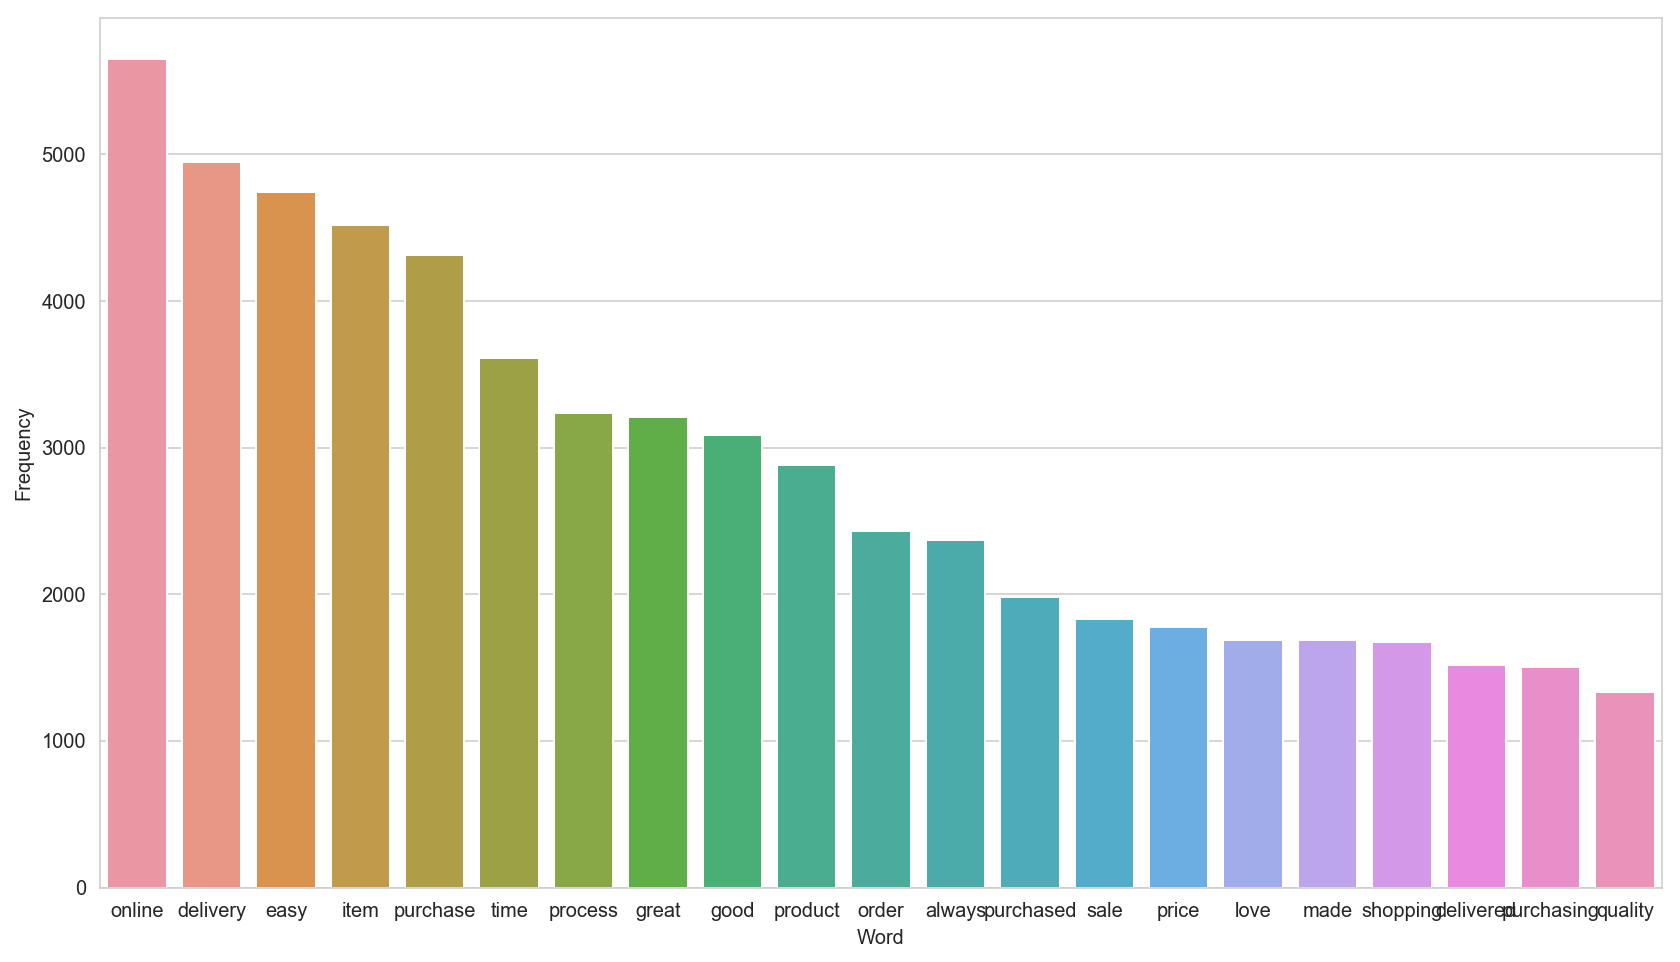

In [48]:
#most common word positive
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = positive['token_clean_new2'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))  
#filtered_words = [word for word in stop_words if word not in stopwords.words('english')]
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words

set(stopwords.words('english'))

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr  ]      # if not word.isnumeric()

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt.head(21))

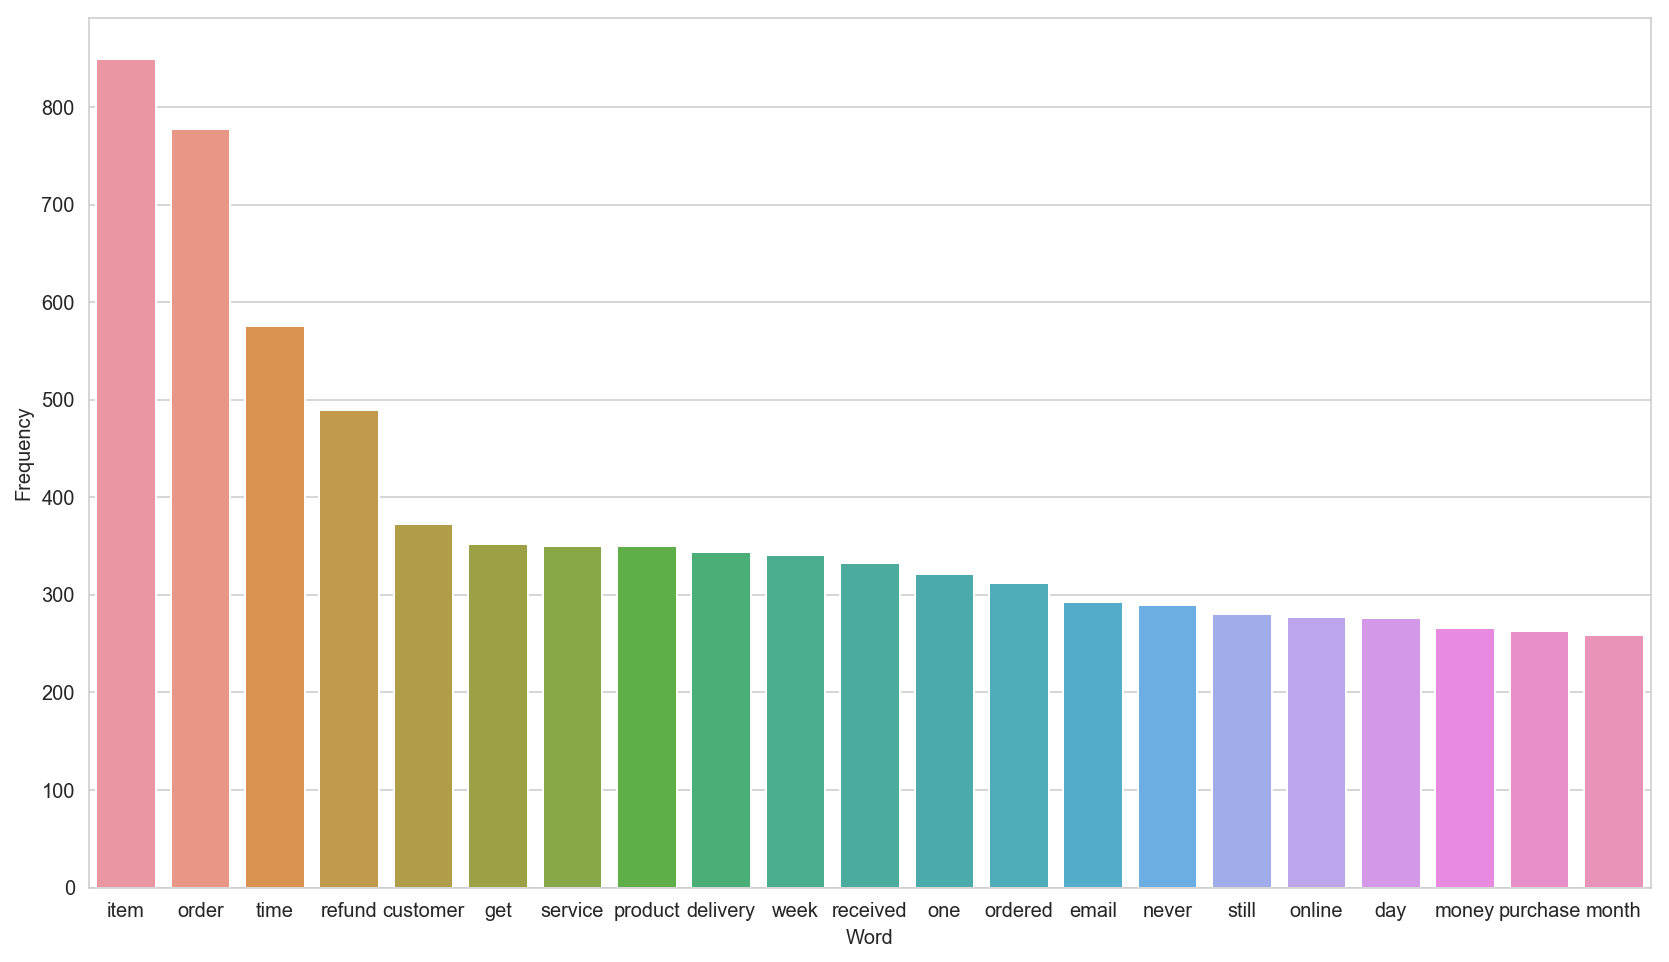

In [49]:
#most common word negative
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = negative['token_clean_new2'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))  
#filtered_words = [word for word in stop_words if word not in stopwords.words('english')]
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words

set(stopwords.words('english'))

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr  ]      # if not word.isnumeric()

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt.head(21))

#### 3.2 Analysing using Textblob
<a id='3.2AnalysingusingTextblob'></a>

According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Review


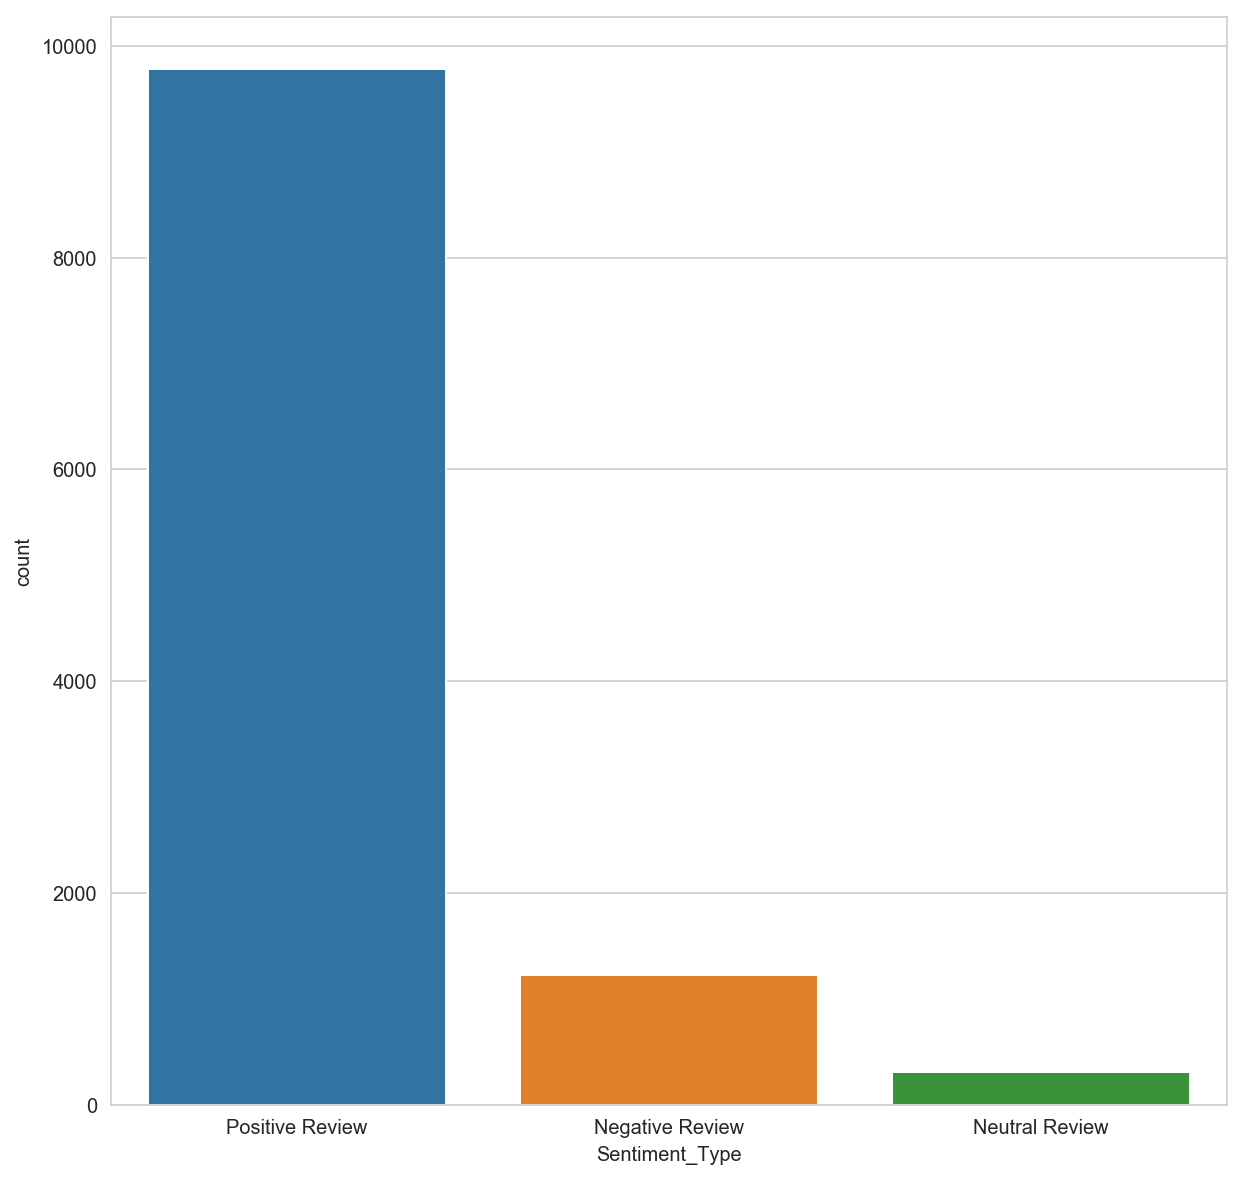

In [59]:
from textblob import TextBlob
#import sys
#reload(sys)
#sys.setdefaultencoding('utf8')
bloblist_desc = list()

df_review_str=all_brand_clean['token_clean_new2'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)
print('According to the above graph, there are more positive reviews but again it depends on the polarity value. I condsidered sentiment value > 0 is Positive Review')

In [60]:
#Removing Short Words
#https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
df_polarity_desc['tidy_comment'] = df_polarity_desc['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_polarity_desc.head(8)

Review  sentiment  polarity  \
0  time experience customer service tend towards ...   0.129167  0.600000   
1  wa easy browse wide range product wish footwea...   0.111111  0.577778   
2  wrong stock arriving broken due poor packaging...  -0.315625  0.596875   
3  order arrived broken missing vital part send m...  -0.090000  0.450000   
4         using year issue order last month resolved   0.000000  0.066667   
5  product good standard ordered many different s...   0.200000  0.516667   
6  never using service would like full refund tod...  -0.134524  0.413046   
7  ordered oakley glass 18th october told today s...   0.400000  0.466667   

    Sentiment_Type                                       tidy_comment  
0  Positive Review  time experience customer service tend towards ...  
1  Positive Review  easy browse wide range product wish footwear l...  
2  Negative Review  wrong stock arriving broken poor packaging sta...  
3  Negative Review  order arrived broken missing vital part send m...  
4   Neutral Review         using year issue order last month resolved  
5  Positive Review  product good standard ordered many different s...  
6  Negative Review  never using service would like full refund tod...  
7  Positive Review  ordered oakley glass 18th october told today s...

In [61]:
#tokenize
tokenized_comment = df_polarity_desc['tidy_comment'].apply(lambda x: x.split(" "))

#make perword
tokenized = df_polarity_desc['tidy_comment'].apply(lambda x: x.split(" "))
df_polarity_desc['tokenized']= tokenized

#fillter word
tokenized = df_polarity_desc['tidy_comment'].apply(lambda x: x.split(" "))
df_polarity_desc['useful_words'] = [word for word in tokenized if word not in stopwords.words('english')]

In [62]:
#Now let’s stitch these tokens back together.
for i in range(len(tokenized)):
    tokenized[i] = " ".join(tokenized[i])
df_polarity_desc['tidy_comment_token'] = tokenized
df_polarity_desc.head(2)

Review  sentiment  polarity  \
0  time experience customer service tend towards ...   0.129167  0.600000   
1  wa easy browse wide range product wish footwea...   0.111111  0.577778   

    Sentiment_Type                                       tidy_comment  \
0  Positive Review  time experience customer service tend towards ...   
1  Positive Review  easy browse wide range product wish footwear l...   

                                           tokenized  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                        useful_words  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                  tidy_comment_token  
0  time experience customer service tend towards ...  
1  easy browse wide range product wish footwear l...

In [63]:
#negative positive
pp= df_polarity_desc[df_polarity_desc.Sentiment_Type=='Positive Review']
nn= df_polarity_desc[df_polarity_desc.Sentiment_Type=='Negative Review']

In [64]:
pp

Review  sentiment  polarity  \
0      time experience customer service tend towards ...   0.129167  0.600000   
1      wa easy browse wide range product wish footwea...   0.111111  0.577778   
5      product good standard ordered many different s...   0.200000  0.516667   
7      ordered oakley glass 18th october told today s...   0.400000  0.466667   
9      purchased blanket site received email hour lat...   0.025000  0.225000   
11     bought item delivered refunded back money one ...   0.291667  0.322222   
12     site used really good site decided try ordered...   0.254545  0.292424   
13     purchased pair shoe one trying get found site ...   0.087500  0.383333   
14     purchased 4 item clothing australian brand wai...   0.187500  0.412500   
17     yesterday order ha arrived 4 set teacup saucer...   0.109524  0.452540   
19     ordered two item came interstate adelaide airp...   0.138889  0.200000   
21     year spent way want acknowledge fyo 2000 since...   0.119081  0.491338   
26     came across google search found nice dress shi...   0.086458  0.406481   
28     loyal customer several year thing finally tipp...   0.074359  0.520940   
29     ordered football gear gift father day two birt...   0.181667  0.486667   
30     purchased jet swimwear upcoming holiday paid f...   0.433333  0.608333   
31     wow emailed 5 time phone number trying get res...   0.100000  1.000000   
32     never complained yet far good cant keep away p...   0.370000  0.600000   
35     unless happy purchase one item receive entirel...   0.044643  0.671429   
40     satisfied wa exactly wa advertised quality sat...   0.362500  0.712500   
43     ozsales ask send video spinner wobble send sen...   0.300000  0.500000   
47     regular buyer usually buy something month boug...   0.251190  0.591636   
48     purchased 5 item including pair thong 3 5 item...   0.200000  0.200000   
49     wa regular buyer begin wa believing wa getting...   0.140000  0.235385   
51     incorrect bed ordered due fault site assistanc...   0.068750  0.443750   
52     highly surprised review fantastic website boug...   0.286667  0.566667   
54     bought quiete bottle favorite fragrant oil ree...   0.031667  0.713333   
55     purchased ride car 300 grandson delivered part...   0.005000  0.436667   
56     purchase wa made online 3 supposedly smart wat...   0.058673  0.487330   
57     take lot time deliver product top whenever ord...   0.083333  0.686111   
...                                                  ...        ...       ...   
11256  initially problem placed several order drama l...   0.047619  0.270833   
11257  purchased number time okay brilliant result re...   0.437500  0.558333   
11260  everyone complains postage read website proper...   0.162500  0.458333   
11261  placed 3 order looked site feedback felt sick ...   0.112500  0.406151   
11262  disgusting customer service fradulent practice...   0.060606  0.557576   
11263  customer service poor get responce essage luck...   0.102381  0.400000   
11264  made many purchase year quality really hit mis...   0.175000  0.292593   
11265  hi every one wish saw brought wallet wallet ha...   0.066667  0.600000   
11269  really surprised negative reveiws made 8 purch...   0.100000  0.500000   
11271  bought 2 pair gucci sunglass received today fa...   0.017172  0.442424   
11273  send currect item order made rest item needed ...   0.100000  0.383333   
11274  ordered 5 week ago still nt received order sev...   0.057143  0.450000   
11276  unlike comment good experiencees sure take lon...   0.379894  0.558289   
11278  premise attractive designer brand sale highly ...   0.166786  0.437976   
11282  sucked like many others advertising oz sale se...   0.081481  0.479630   
11283  still waiting item paid 200 called 50 pricey d...   0.026923  0.416667   
11287  bought husband pair sunglass supposed expensiv...   0.040000  0.580000   
11288  unhappy return policy pair shoe bought nt fit ...   0.087273  0.450909   


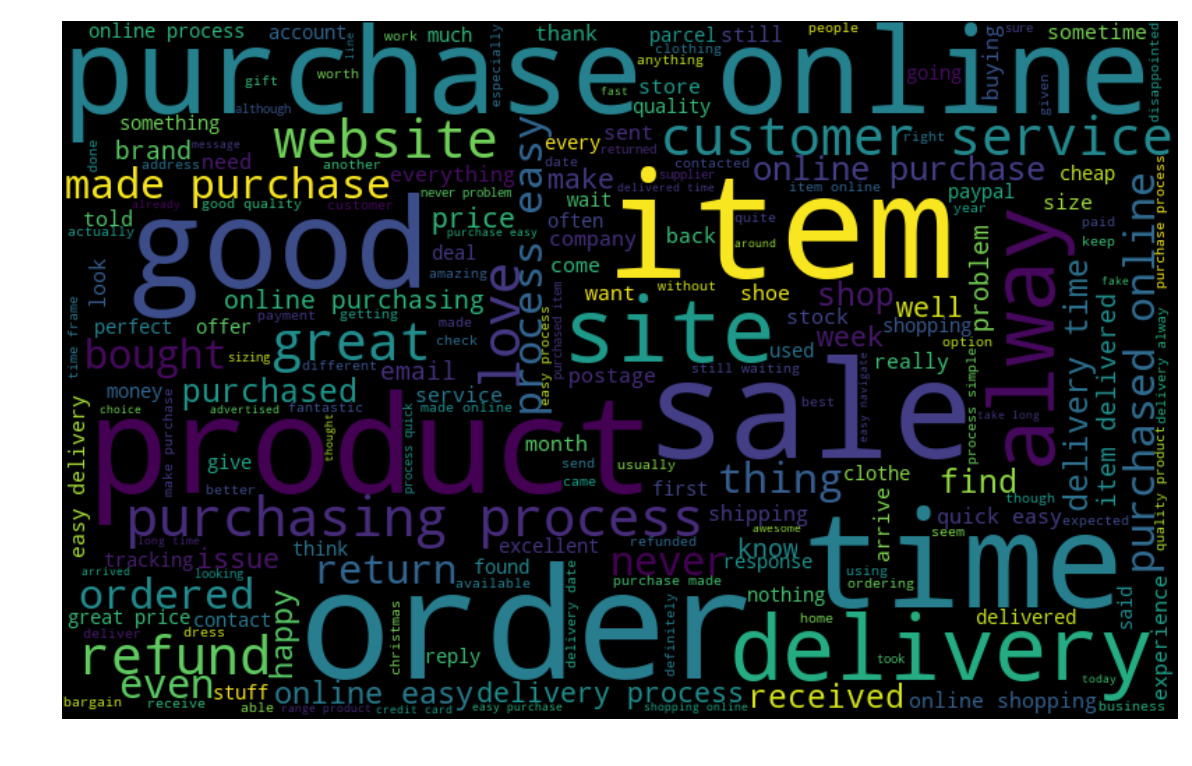

In [65]:
# Story Generation and Visualization from comments
#What are the most common words in the entire dataset?
all_words = ' '.join([text for text in df_polarity_desc['tidy_comment_token']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

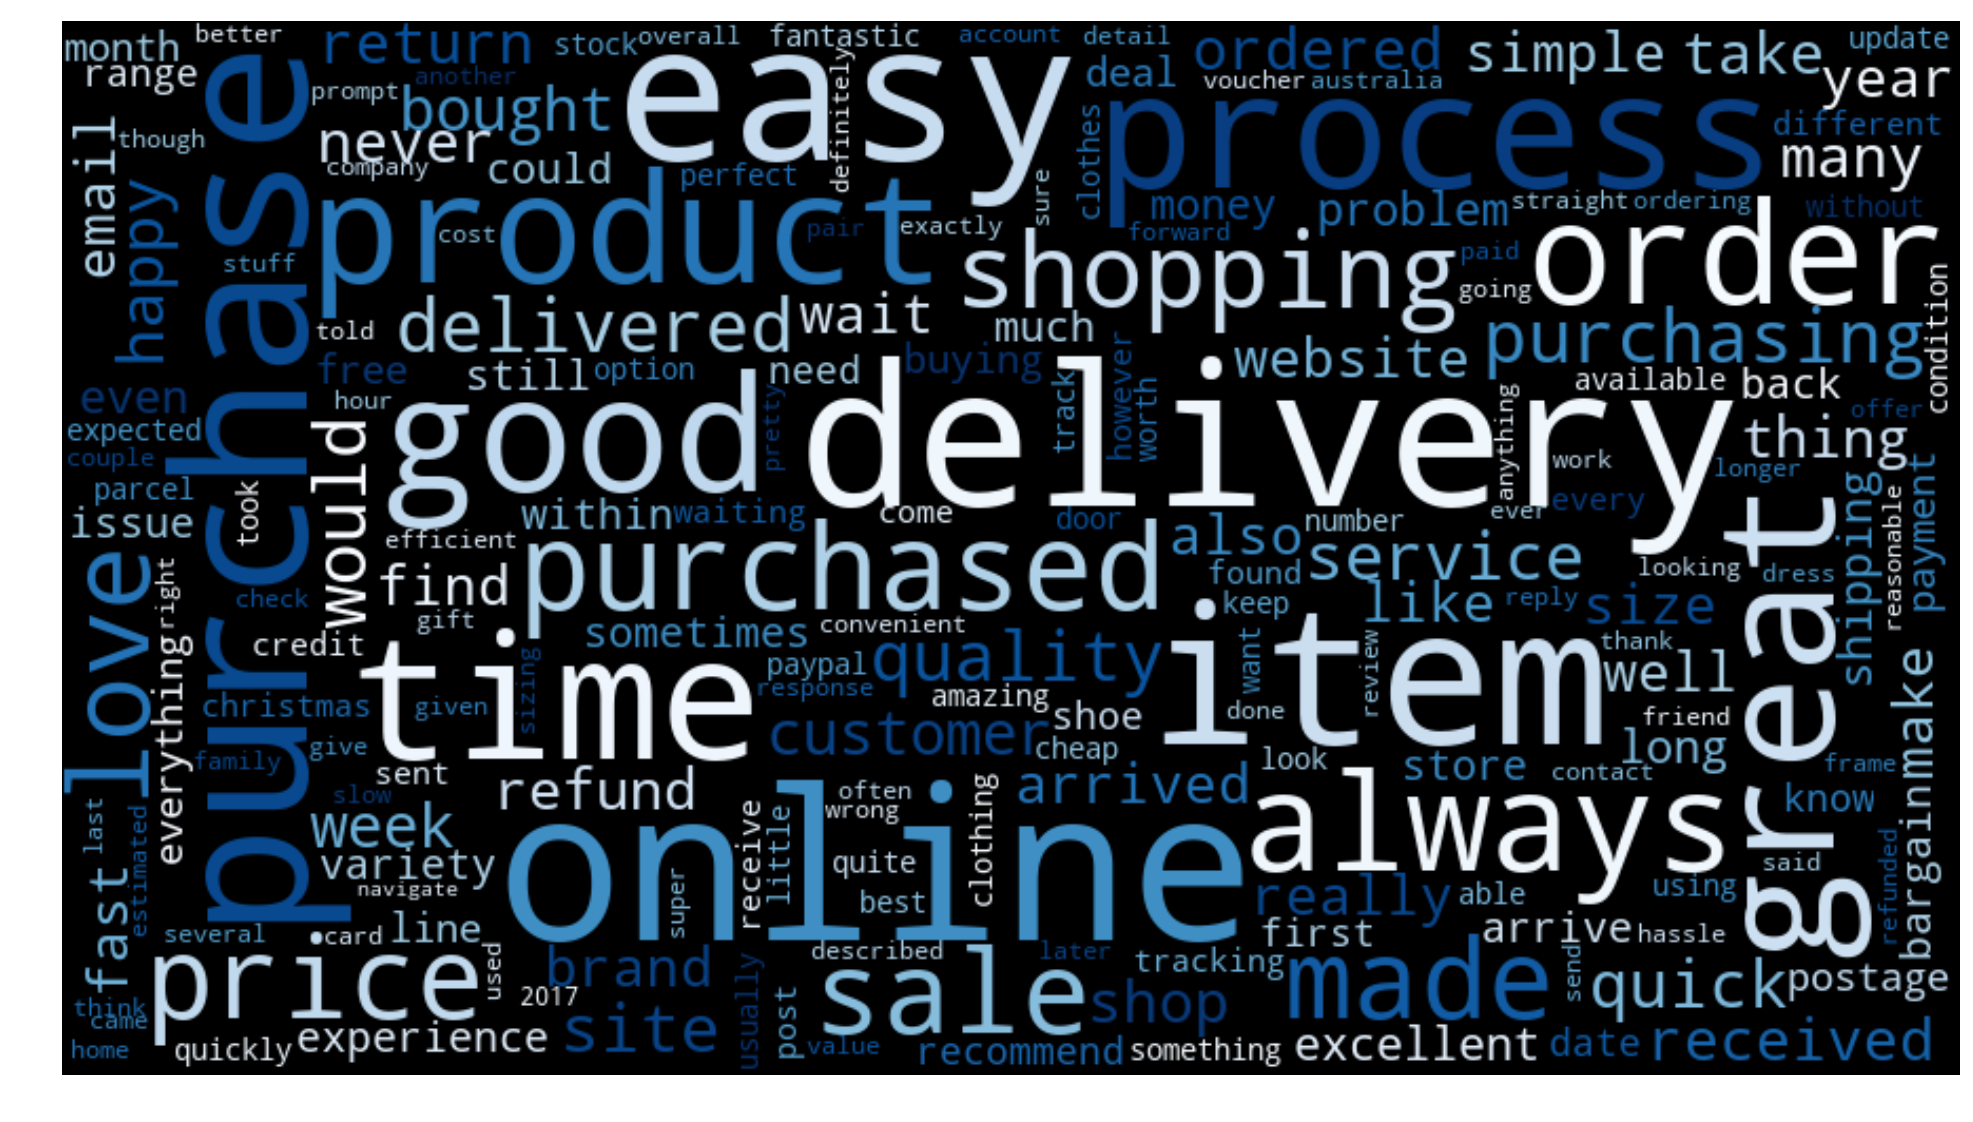

In [66]:
# positive
all_words = []
for line in pp['useful_words']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=200,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

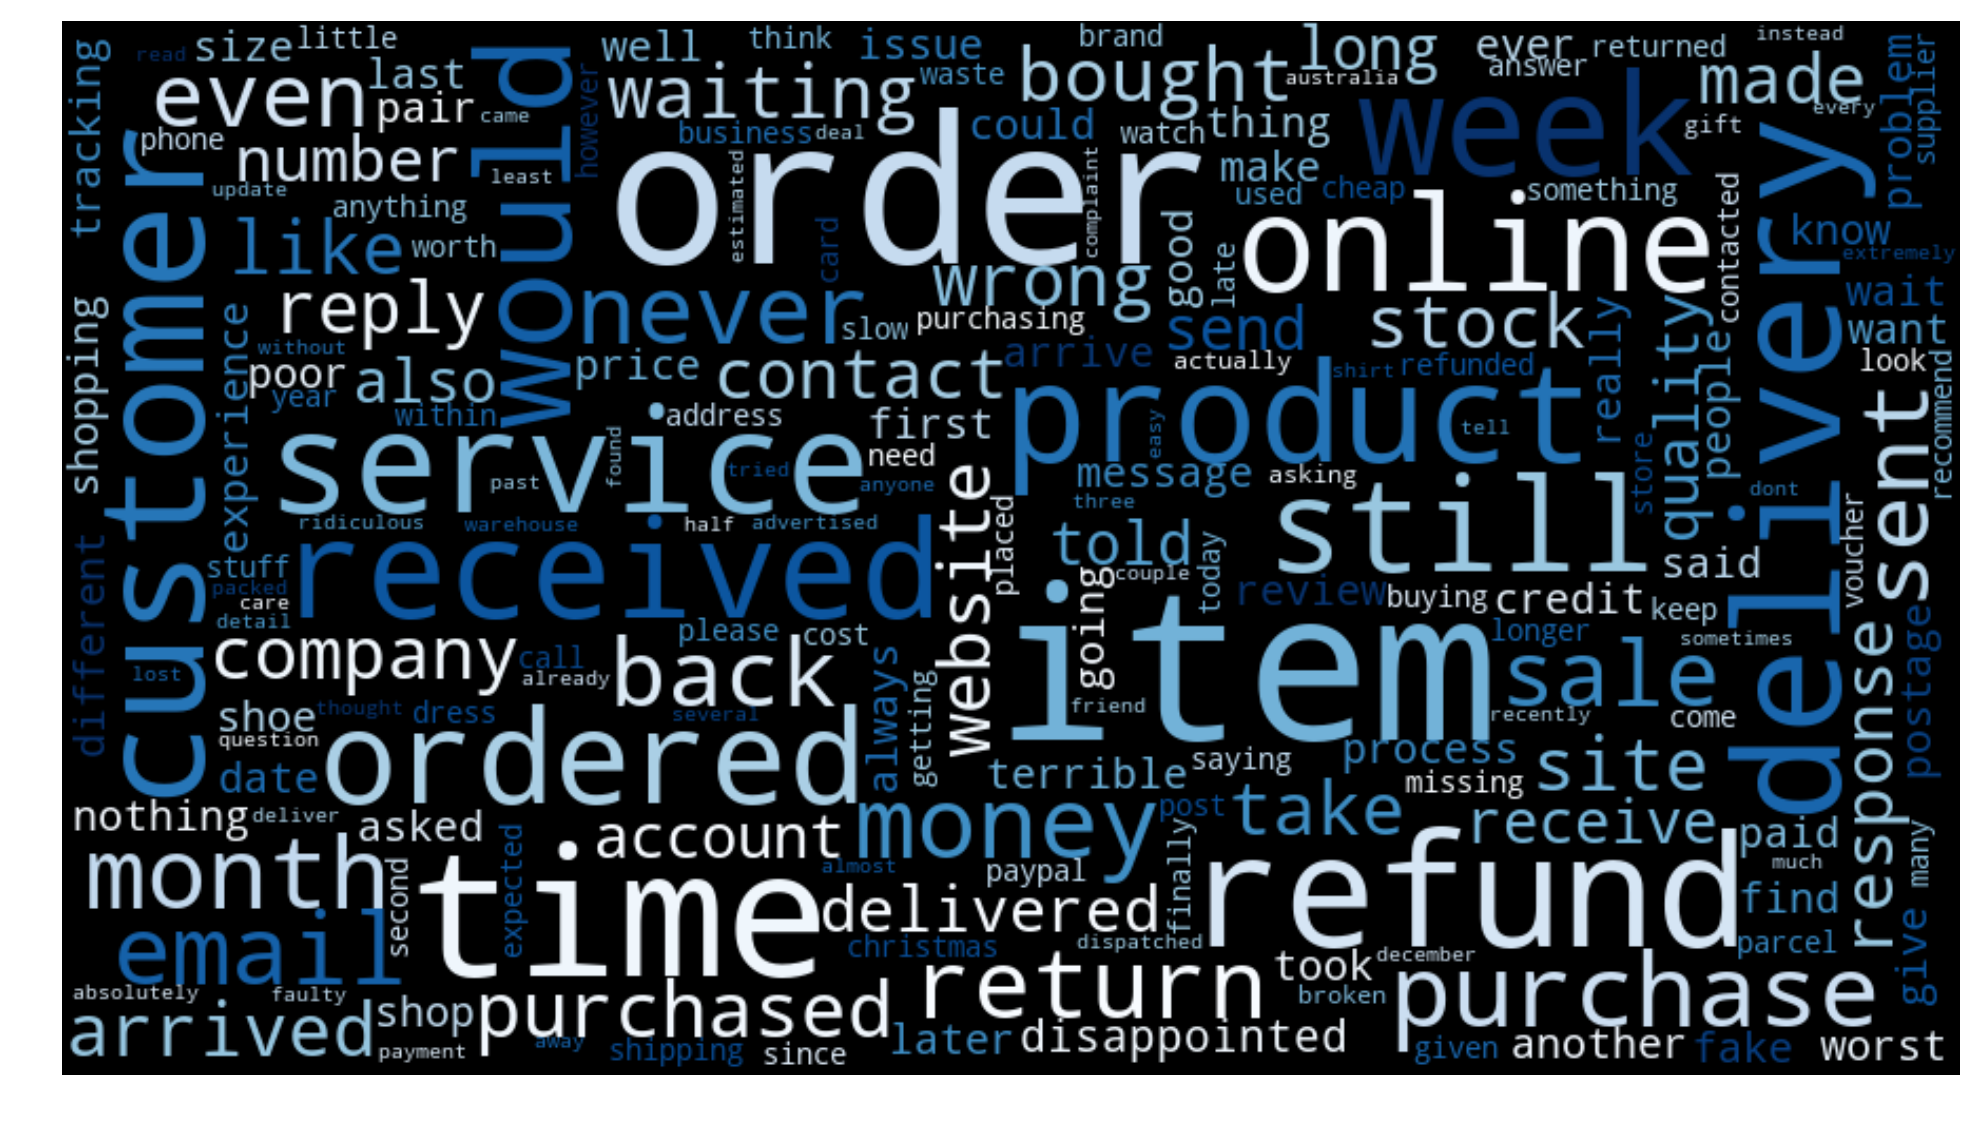

In [67]:
# negative
all_words = []
for line in nn['useful_words']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=200,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 3.2.1 Most Common word use
<a id='3.2.1Mostcommonwords'></a>

In [68]:
df_polarity_desc.head(2)

Review  sentiment  polarity  \
0  time experience customer service tend towards ...   0.129167  0.600000   
1  wa easy browse wide range product wish footwea...   0.111111  0.577778   

    Sentiment_Type                                       tidy_comment  \
0  Positive Review  time experience customer service tend towards ...   
1  Positive Review  easy browse wide range product wish footwear l...   

                                           tokenized  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                        useful_words  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                  tidy_comment_token  
0  time experience customer service tend towards ...  
1  easy browse wide range product wish footwear l...

In [69]:
poss=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
nega=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [70]:
poss.head(2)

Review  sentiment  polarity  \
0  time experience customer service tend towards ...   0.129167  0.600000   
1  wa easy browse wide range product wish footwea...   0.111111  0.577778   

    Sentiment_Type                                       tidy_comment  \
0  Positive Review  time experience customer service tend towards ...   
1  Positive Review  easy browse wide range product wish footwear l...   

                                           tokenized  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                        useful_words  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                  tidy_comment_token  
0  time experience customer service tend towards ...  
1  easy browse wide range product wish footwear l...

Word  Frequency
0       online       5787
1     delivery       5052
2         easy       4808
3         item       4701
4     purchase       4413
5         time       3780
6      process       3342
7        great       3238
8         good       3207
9      product       2978
10       order       2551
11      always       2438
12   purchased       2035
13        sale       1879
14       price       1821
15        made       1756
16        love       1699
17    shopping       1682
18  purchasing       1562
19   delivered       1561
20     quality       1371

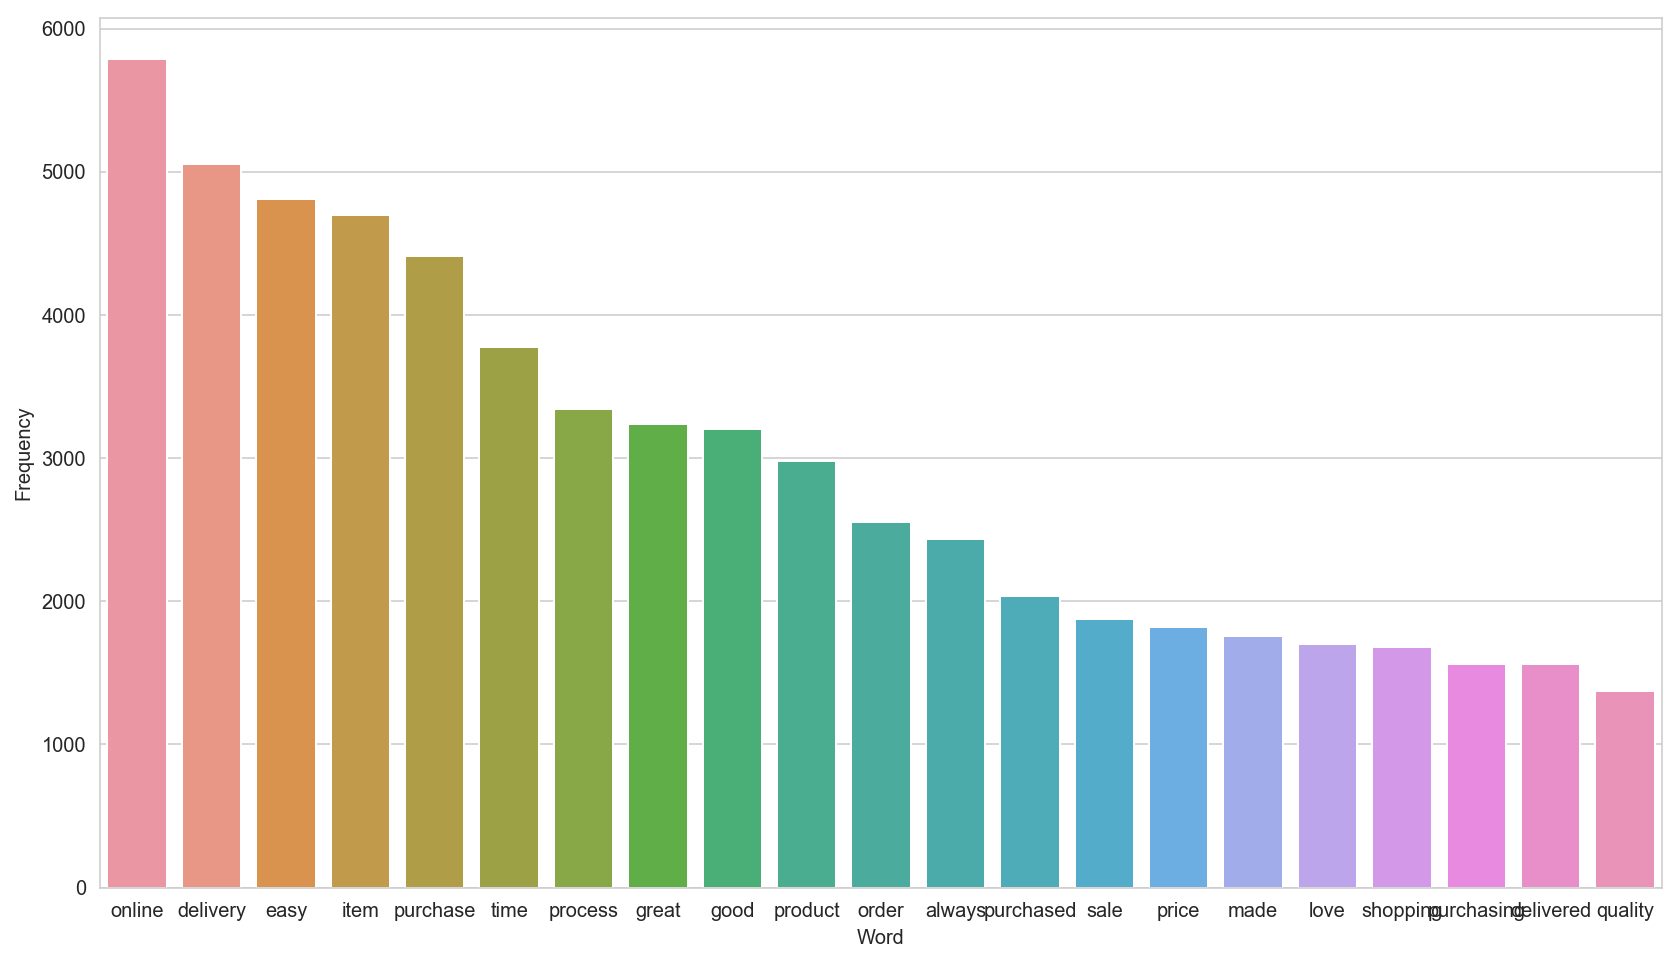

In [71]:
#most common word positive
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = poss['tidy_comment_token'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))  
#filtered_words = [word for word in stop_words if word not in stopwords.words('english')]
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words

set(stopwords.words('english'))

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr  ]      # if not word.isnumeric()

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt.head(21))
rslt.head(21)

Word  Frequency
0       item        982
1      order        916
2       time        669
3     refund        509
4   delivery        450
5   customer        435
6    service        419
7       week        408
8    product        397
9   received        379
10    online        362
11   ordered        346
12     still        345
13  purchase        337
14     month        322
15     money        321
16     never        311
17     email        310
18    return        293
19      sent        282
20      back        282

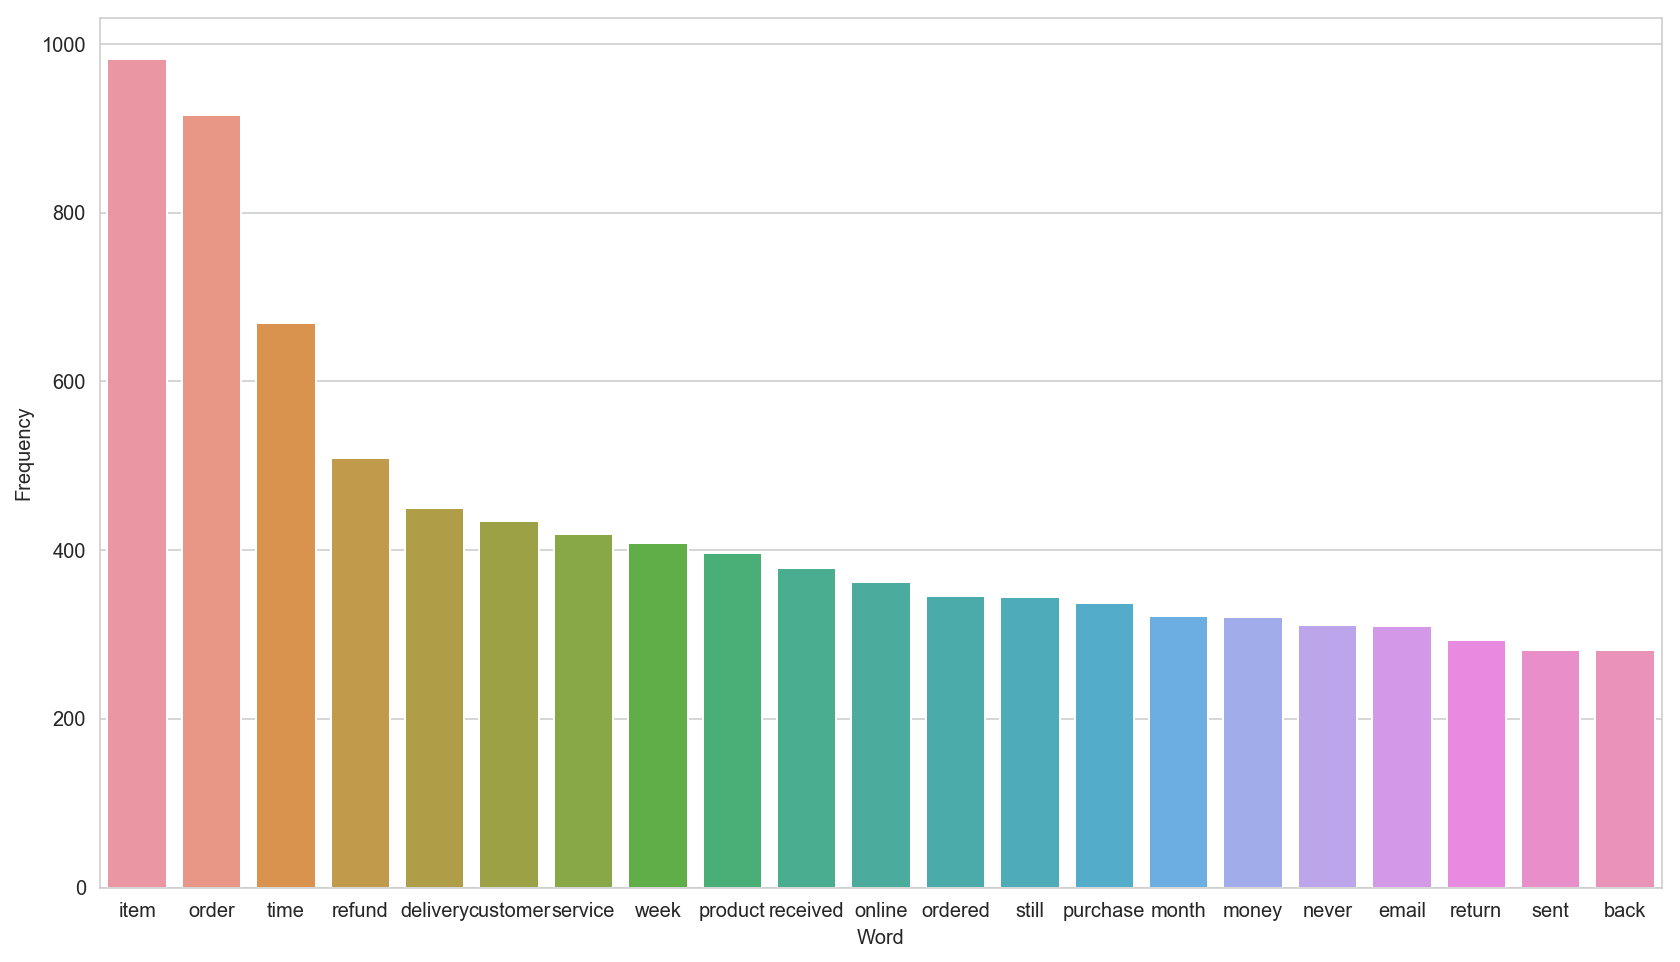

In [72]:
#most common word positive
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = nega['tidy_comment_token'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))  
#filtered_words = [word for word in stop_words if word not in stopwords.words('english')]
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
stop_words

set(stopwords.words('english'))

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr  ]      # if not word.isnumeric()

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt.head(21))
rslt.head(21)

## Testing Accuracy
#### Training Data and Test Data CountVectorizer
<a id='TestingAccuracy'></a>
<a id='TrainingDataandTestDataCountVectorizer'></a>

In [73]:
all_brand_clean.head(2)

Unnamed: 0                                           comments  \
0           0  At a time when our experiences with customer s...   
1           1  It was easy to browse through and you have a w...   

           date    names  rating   brand  word count  Character Count  \
0  Nov 04, 2018  Natalie     5.0  ozsale         132              713   
1  Nov 04, 2018    Ginny     5.0  ozsale          32              176   

                                        summaryClean  \
0  at a time when our experiences with customer s...   
1  it was easy to browse through and you have a w...   

                                   stem_summaryClean  ...   \
0  at a time when our experi with custom servic t...  ...    
1  it wa easi to brows through and you have a wid...  ...    

                         lemmatize_word_summaryClean  \
0  at a time when our experience with customer se...   
1  it wa easy to browse through and you have a wi...   

                                              tokens  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                         token_clean  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                    token_clean_new2 Polarity Score  \
0  time experience customer service tend towards ...         0.7184   
1  wa easy browse wide range product wish footwea...         0.6808   

   Neutral Score  Negative Score  Positive Score  Sentiment label  
0          0.603           0.148           0.249   Positive     1  
1          0.714           0.000           0.286   Positive     1  

[2 rows x 21 columns]

In [74]:
X_review=all_brand_clean['token_clean_new2']
y=all_brand_clean.rating.values

#X_reviewupsampled[['token_clean_new2']]
#y=upsampled.label

from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)
X_review = bow_transformer.transform(X_review)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

predict=nb.predict(X_test)
predict

array([1., 5., 5., ..., 5., 5., 4.])

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[ 471    0    2    6    2]
 [  61    0    0    7    4]
 [  32    0    1   67   29]
 [  27    0    0  311  591]
 [  31    2    0  168 1581]]
              precision    recall  f1-score   support

         1.0       0.76      0.98      0.85       481
         2.0       0.00      0.00      0.00        72
         3.0       0.33      0.01      0.02       129
         4.0       0.56      0.33      0.42       929
         5.0       0.72      0.89      0.79      1782

   micro avg       0.70      0.70      0.70      3393
   macro avg       0.47      0.44      0.42      3393
weighted avg       0.65      0.70      0.65      3393



In [77]:
display( all_brand_clean.comments.iloc[0])
display(all_brand_clean.rating.iloc[0])

'At a time when our experiences with customer service tend towards the negative it is refreshing to come across a business that actually knows how to treat their customers well. I have been buying through Ozsale since it’s inception and can not fault them. I have had incorrect items sent, purchases lost in transit - the whole gamut of things that can go wrong with buying online - and every time it’s happened Ozsale has handled it quickly and in a manner that is favourable to the customer. If everyone has been treated as well as I have by this company, I’m not surprised they are still around today. I will be continuing to buy from them and encourage anyone to give them a try. They are one of the good ones.'

5.0

In [78]:
positive =all_brand_clean.comments.iloc[0]
rating_negative_transformed = bow_transformer.transform([positive])
nb.predict(rating_negative_transformed)[0]

1.0

In [79]:
display( all_brand_clean.comments.iloc[8])
display(all_brand_clean.rating.iloc[8])

'After almost a month waiting for my purchase and checking the status, my surprise was that my order was cancelled and refund without prior notice. I have contacted twice to their customer service regarding an explanation without success. \r\nWhat a waste of time. take for ever to receive the products if they sent it to you, post and return service is expensive and customer service is shocking. Better buy elsewhere.'

1.0

In [80]:
negative=all_brand_clean.comments.iloc[8]
rating_negative_transformed = bow_transformer.transform([negative])
nb.predict(rating_negative_transformed)[0]

1.0

#### Training Data and Test Data TfidfVectorizer
<a id='TrainingDataandTestDataTfidfVectorizer'></a>

## Example handle inbalance data Sentimental Analyzer
<a id='Examplehandleinbalancedata'></a>
To overcome this problem, we can either DownSample the majority Class or UpSample the minority class. In this notebook I will use an Oversampling technique from the handy SMOTE library. Let's apply this technique and then re-run all four models to re-assess precision & recall performance.

https://www.kaggle.com/josh24990/nlp-ml-which-words-predict-a-recommendation

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/


In [81]:
all_brand_clean.head(2)

Unnamed: 0                                           comments  \
0           0  At a time when our experiences with customer s...   
1           1  It was easy to browse through and you have a w...   

           date    names  rating   brand  word count  Character Count  \
0  Nov 04, 2018  Natalie     5.0  ozsale         132              713   
1  Nov 04, 2018    Ginny     5.0  ozsale          32              176   

                                        summaryClean  \
0  at a time when our experiences with customer s...   
1  it was easy to browse through and you have a w...   

                                   stem_summaryClean  ...   \
0  at a time when our experi with custom servic t...  ...    
1  it wa easi to brows through and you have a wid...  ...    

                         lemmatize_word_summaryClean  \
0  at a time when our experience with customer se...   
1  it wa easy to browse through and you have a wi...   

                                              tokens  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                         token_clean  \
0  [time, experience, customer, service, tend, to...   
1  [wa, easy, browse, wide, range, product, wish,...   

                                    token_clean_new2 Polarity Score  \
0  time experience customer service tend towards ...         0.7184   
1  wa easy browse wide range product wish footwea...         0.6808   

   Neutral Score  Negative Score  Positive Score  Sentiment label  
0          0.603           0.148           0.249   Positive     1  
1          0.714           0.000           0.286   Positive     1  

[2 rows x 21 columns]

In [82]:
#baseline
print(all_brand_clean.label.value_counts()/len(all_brand_clean.label))
print (all_brand_clean.label.value_counts())

 1    0.836753
-1    0.089671
 0    0.073576
Name: label, dtype: float64
 1    9462
-1    1014
 0     832
Name: label, dtype: int64


In [83]:
#upsample
one = all_brand_clean[all_brand_clean.label==1]
zero = all_brand_clean[all_brand_clean.label==0]
minusone = all_brand_clean[all_brand_clean.label== -1]

In [84]:
# Upsample minority class
from sklearn.utils import resample
one_upsampled = resample(one,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results
zero_upsampled = resample(zero,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results
minusone_upsampled = resample(minusone,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results

In [85]:
upsampled = pd.concat([one_upsampled,zero_upsampled,minusone_upsampled])
upsampled.label.value_counts()

 1    1000
-1    1000
 0    1000
Name: label, dtype: int64

In [86]:
#add more word
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)

X_df=upsampled[['token_clean_new2']]
y=upsampled.label
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=48,train_size=0.8, stratify=y)

#TfidfVectorizer CountVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=1788)
X_train_me = vect.fit_transform(X_train.token_clean_new2)
X_test_me = vect.transform(X_test.token_clean_new2)

train_count_vect_df = pd.DataFrame(X_train_me.todense(), columns=vect.get_feature_names())
test_count_vect_df = pd.DataFrame(X_test_me.todense(), columns=vect.get_feature_names())

X_train_me=pd.concat([X_train.drop('token_clean_new2',axis=1).reset_index(drop=True), train_count_vect_df], axis=1)
X_test_me=pd.concat([X_test.drop('token_clean_new2',axis=1).reset_index(drop=True), test_count_vect_df], axis=1)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [87]:
logr_v3=LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', n_jobs=-1, random_state=48)
logr_v3.fit(X_train_me,y_train)

LogisticRegression(C=30.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=48, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

'Accuracy is: '

0.705

              precision    recall  f1-score   support

          -1       0.77      0.77      0.77       200
           0       0.64      0.71      0.67       200
           1       0.72      0.64      0.68       200

   micro avg       0.70      0.70      0.70       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.70      0.71       600



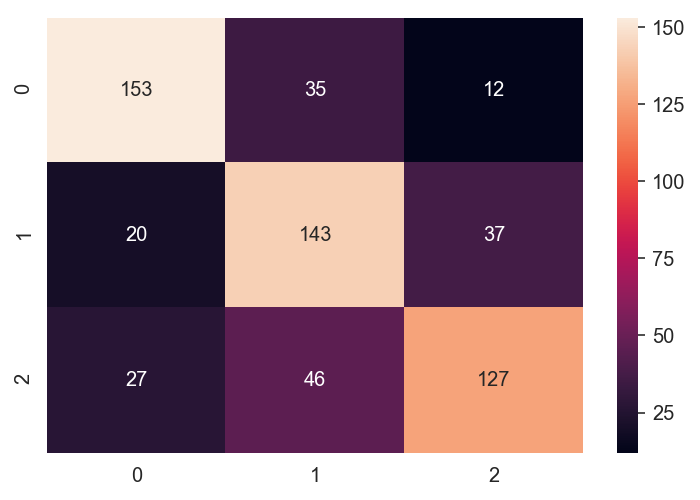

In [88]:
ac = accuracy_score(y_test,logr_v3.predict(X_test_me))
display('Accuracy is: ',ac)
cm = confusion_matrix(y_test,logr_v3.predict(X_test_me))
sns.heatmap(cm,annot=True,fmt="d")

y_pred=logr_v3.predict(X_test_me)
logr_v3_score=metrics.classification_report(y_test, y_pred)
print(logr_v3_score)

In [89]:
logr_coefs = pd.DataFrame(columns=X_train_me.columns,data=logr_v3.coef_,index=logr_v3.classes_)
logr_coefs=logr_coefs.T.loc[(logr_coefs.apply(sum)>0)].T
for i,e in enumerate(logr_v3.classes_):
    display('class:',e)
    display(np.abs(logr_coefs.iloc[i,:]).sort_values(ascending=False).head(8))
    print('------------------------------------\n')

'class:'

-1

wa wrong           5.332244
waste time         5.306725
reasonable time    4.949266
watch wa           4.694603
postage item       4.534966
order past         4.474893
online easy        4.473091
bad review         4.348739
Name: -1, dtype: float64

------------------------------------



'class:'

0

need know           4.432047
wa really           4.306413
saying item         4.296681
week wa             4.245936
purchase wa easy    4.189486
working day         4.142865
courier service     4.123441
online regularly    4.109555
Name: 0, dtype: float64

------------------------------------



'class:'

1

love shopping    5.579888
great sale       5.228730
easy use         5.105368
process easy     5.025917
happy product    4.855302
wa good          4.588518
online love      4.477464
sale ha          4.409265
Name: 1, dtype: float64

------------------------------------



## Example handle inbalance data Text blob

In [90]:
df_polarity_desc.head(2)

Review  sentiment  polarity  \
0  time experience customer service tend towards ...   0.129167  0.600000   
1  wa easy browse wide range product wish footwea...   0.111111  0.577778   

    Sentiment_Type                                       tidy_comment  \
0  Positive Review  time experience customer service tend towards ...   
1  Positive Review  easy browse wide range product wish footwear l...   

                                           tokenized  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                        useful_words  \
0  [time, experience, customer, service, tend, to...   
1  [easy, browse, wide, range, product, wish, foo...   

                                  tidy_comment_token  
0  time experience customer service tend towards ...  
1  easy browse wide range product wish footwear l...

In [91]:
#baseline
print(df_polarity_desc.Sentiment_Type.value_counts()/len(df_polarity_desc.Sentiment_Type))
print (df_polarity_desc.Sentiment_Type.value_counts())

Positive Review    0.864786
Negative Review    0.108065
Neutral Review     0.027149
Name: Sentiment_Type, dtype: float64
Positive Review    9779
Negative Review    1222
Neutral Review      307
Name: Sentiment_Type, dtype: int64


In [92]:
#upsample
Positive_review = df_polarity_desc[df_polarity_desc.Sentiment_Type=='Positive Review']
Neutral_review = df_polarity_desc[df_polarity_desc.Sentiment_Type=='Neutral Review']
Negative_review = df_polarity_desc[df_polarity_desc.Sentiment_Type== 'Negative Review']

In [93]:
# Upsample minority class
from sklearn.utils import resample
positive_upsampled = resample(Positive_review,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results
neutral_upsampled = resample(Neutral_review,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results
negative_upsampled = resample(Negative_review,replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=48) # reproducible results

In [94]:
textblob_upsampled = pd.concat([positive_upsampled,neutral_upsampled,negative_upsampled])
textblob_upsampled.Sentiment_Type.value_counts()

Positive Review    1000
Neutral Review     1000
Negative Review    1000
Name: Sentiment_Type, dtype: int64

In [95]:
#add more word
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)

X_df=textblob_upsampled[['tidy_comment_token']]
y=textblob_upsampled.Sentiment_Type
X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=48,train_size=0.8, stratify=y)

#TfidfVectorizer CountVectorizer
vect = TfidfVectorizer(ngram_range=(2,3),stop_words=custom_stop_words,max_features=1788)
X_train_me = vect.fit_transform(X_train.tidy_comment_token)
X_test_me = vect.transform(X_test.tidy_comment_token)

train_count_vect_df = pd.DataFrame(X_train_me.todense(), columns=vect.get_feature_names())
test_count_vect_df = pd.DataFrame(X_test_me.todense(), columns=vect.get_feature_names())

X_train_me=pd.concat([X_train.drop('tidy_comment_token',axis=1).reset_index(drop=True), train_count_vect_df], axis=1)
X_test_me=pd.concat([X_test.drop('tidy_comment_token',axis=1).reset_index(drop=True), test_count_vect_df], axis=1)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


'Accuracy is: '

0.8

                 precision    recall  f1-score   support

Negative Review       0.73      0.81      0.77       200
 Neutral Review       0.85      0.87      0.86       200
Positive Review       0.84      0.71      0.77       200

      micro avg       0.80      0.80      0.80       600
      macro avg       0.80      0.80      0.80       600
   weighted avg       0.80      0.80      0.80       600



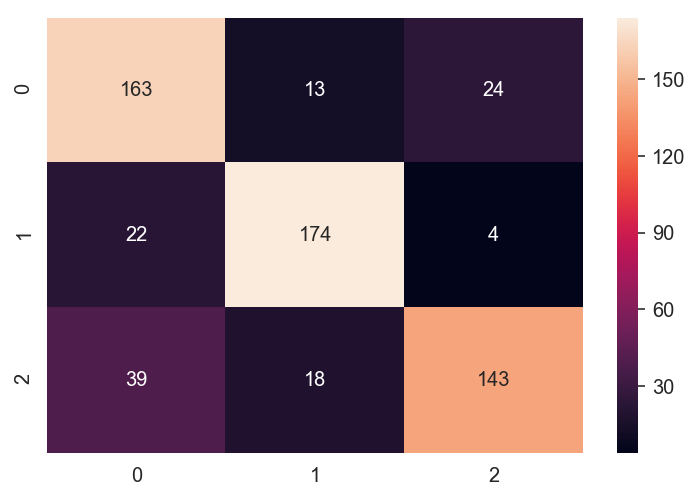

In [96]:
logr_v3=LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',multi_class='multinomial', n_jobs=-1, random_state=48)
logr_v3.fit(X_train_me,y_train)

ac = accuracy_score(y_test,logr_v3.predict(X_test_me))
display('Accuracy is: ',ac)
cm = confusion_matrix(y_test,logr_v3.predict(X_test_me))
sns.heatmap(cm,annot=True,fmt="d")

y_pred=logr_v3.predict(X_test_me)
logr_v3_score=metrics.classification_report(y_test, y_pred)
print(logr_v3_score)

In [97]:
logr_coefs = pd.DataFrame(columns=X_train_me.columns,data=logr_v3.coef_,index=logr_v3.classes_)
logr_coefs=logr_coefs.T.loc[(logr_coefs.apply(sum)>0)].T
for i,e in enumerate(logr_v3.classes_):
    display('class:',e)
    display(np.abs(logr_coefs.iloc[i,:]).sort_values(ascending=False).head(8))
    print('------------------------------------\n')

'class:'

'Negative Review'

process simple easy          5.239551
time poor                    4.838310
online purchasing process    4.546007
broken item                  4.458789
cheap nasty                  4.444979
contact section              4.329844
purchase clothes             4.069412
order arrived                3.977462
Name: Negative Review, dtype: float64

------------------------------------



'class:'

'Neutral Review'

online purchasing process    5.543395
forward shopping             5.328030
purchased online issue       4.648987
address contact              4.585322
process easy                 4.452936
delivery prompt              3.892501
christmas shopping           3.888773
clothes shoe                 3.874385
Name: Neutral Review, dtype: float64

------------------------------------



'class:'

'Positive Review'

quick easy              6.299772
great price             6.003149
process easy            5.046466
service great           4.913761
quality item            4.903001
fair trading            4.620414
variety product         4.596711
purchase online easy    4.560266
Name: Positive Review, dtype: float64

------------------------------------



#### 2 naive bayes classifier
<a id='2naivebayesclassifier'></a>

https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-two-3ed2670f927d

In this classification task we are going to use a Naive Bayes (NB) classifier which is based on the Bayes Theorem. In a nutshell, the NB classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

So for example, a fruit may be considered to be an orange if it is orange in color, round, and about 3″ in diameter. A Naive Bayes classifier considers each of these “features” (orange, round, 3” in diameter) to contribute independently to the probability that the fruit is an apple, regardless of any correlations between features. 

Features, however, aren’t always independent which is often seen as a shortcoming of the Naive Bayes algorithm and this is why it’s labeled “naive”. However it is relatively simple to understand, build and train and mostly very fast all which makes it a good candidate for sentiment classification.

https://www.quora.com/What-is-the-best-way-to-do-sentiment-analysis-with-Python-I’m-looking-for-a-sentiment-analysis-API-that-I-can-add-an-emoticon-dictionary-to-I-have-no-idea-how-to-use-NLTK-Can-anyone-help-me-with-that

https://www.pythonforengineers.com/build-a-sentiment-analysis-app-with-movie-reviews/

In [98]:
import collections
import nltk.metrics
from nltk.classify import NaiveBayesClassifier
import nltk.classify.util

'Accuracy is: '

0.7316666666666667

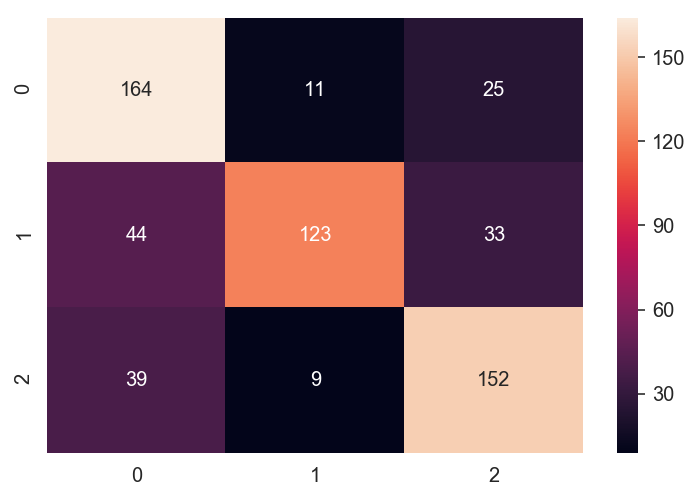

In [99]:
#MultinomialNB
from sklearn.naive_bayes import ComplementNB
classifier=MultinomialNB()
classifier.fit(X_train_me,y_train)
ac = accuracy_score(y_test,classifier.predict(X_test_me))
display('Accuracy is: ',ac)
cm = confusion_matrix(y_test,classifier.predict(X_test_me))
sns.heatmap(cm,annot=True,fmt="d")

In [100]:
logr_coefs = pd.DataFrame(columns=X_train_me.columns,data=logr_v3.coef_,index=logr_v3.classes_)
logr_coefs=logr_coefs.T.loc[(logr_coefs.apply(sum)>0)].T
for i,e in enumerate(logr_v3.classes_):
    display('class:',e)
    display(np.abs(logr_coefs.iloc[i,:]).sort_values(ascending=False).head(8))
    print('------------------------------------\n')

'class:'

'Negative Review'

process simple easy          5.239551
time poor                    4.838310
online purchasing process    4.546007
broken item                  4.458789
cheap nasty                  4.444979
contact section              4.329844
purchase clothes             4.069412
order arrived                3.977462
Name: Negative Review, dtype: float64

------------------------------------



'class:'

'Neutral Review'

online purchasing process    5.543395
forward shopping             5.328030
purchased online issue       4.648987
address contact              4.585322
process easy                 4.452936
delivery prompt              3.892501
christmas shopping           3.888773
clothes shoe                 3.874385
Name: Neutral Review, dtype: float64

------------------------------------



'class:'

'Positive Review'

quick easy              6.299772
great price             6.003149
process easy            5.046466
service great           4.913761
quality item            4.903001
fair trading            4.620414
variety product         4.596711
purchase online easy    4.560266
Name: Positive Review, dtype: float64

------------------------------------



#### detail per rating

In [101]:
for i,e in enumerate(logr_v3.classes_):
    if i ==2:
        display('rating:',e)
        display('Top 5 positive coefs')
        display(logr_coefs.iloc[i,:].sort_values(ascending=False).head(5))
        display('Top 5 negative coefs')
        display(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(5))
        print('------------------------------------\n')

'rating:'

'Positive Review'

'Top 5 positive coefs'

quick easy       6.299772
great price      6.003149
process easy     5.046466
service great    4.913761
quality item     4.903001
Name: Positive Review, dtype: float64

'Top 5 negative coefs'

online received       -3.521455
line purchase         -3.574644
time price            -3.721625
process simple easy   -3.854119
return product        -4.027624
Name: Positive Review, dtype: float64

------------------------------------



In [102]:
for i,e in enumerate(logr_v3.classes_):
    if i ==1:
        print('rating:',e)
        print('Top 5 positive coefs')
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).head(5))
        print('Top 5 negative coefs')
        print(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(5))
        print('------------------------------------\n')

rating: Neutral Review
Top 5 positive coefs
online purchasing process    5.543395
forward shopping             5.328030
purchased online issue       4.648987
address contact              4.585322
delivery prompt              3.892501
Name: Neutral Review, dtype: float64
Top 5 negative coefs
long delivery        -3.605444
process quick        -3.720339
clothes shoe         -3.874385
christmas shopping   -3.888773
process easy         -4.452936
Name: Neutral Review, dtype: float64
------------------------------------



In [103]:
for i,e in enumerate(logr_v3.classes_):
    if i ==0:
        display('rating:',e)
        display('Top 5 positive coefs')
        display(logr_coefs.iloc[i,:].sort_values(ascending=False).head(5))
        display('Top 5 negative coefs')
        display(logr_coefs.iloc[i,:].sort_values(ascending=False).tail(5))
        print('------------------------------------\n')

'rating:'

'Negative Review'

'Top 5 positive coefs'

process simple easy    5.239551
time poor              4.838310
broken item            4.458789
cheap nasty            4.444979
contact section        4.329844
Name: Negative Review, dtype: float64

'Top 5 negative coefs'

quick easy                  -3.718418
purchase online easy        -3.721000
great price                 -3.836274
purchase clothes            -4.069412
online purchasing process   -4.546007
Name: Negative Review, dtype: float64

------------------------------------



## Future Extraction

In [104]:
#using TfidfVectorizer
work_stop_words = list(ENGLISH_STOP_WORDS)
#work_stop_words.append('Customer Service')

X_review=textblob_upsampled[['tidy_comment_token']]
y=textblob_upsampled.Sentiment_Type

Tfidfvec = TfidfVectorizer(stop_words=work_stop_words, max_features=99, ngram_range=(2,3))
Tfidfvectorizers = Tfidfvec.fit_transform(textblob_upsampled.tidy_comment_token.values)
tidy_comment_token_Tfidfvectorizers  = pd.DataFrame(Tfidfvectorizers.todense(), columns=Tfidfvec.get_feature_names())

X=tidy_comment_token_Tfidfvectorizers

In [105]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
cols = list(X.columns)
# build the selector (we'll build one with each score type)
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# examine results
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.sort_values('f_classif', ascending=False).head(21)

feature f_classif chi2 score
8             customer service   56.7347    74.9255
56                process easy   49.9518    59.9588
73                  quick easy   40.4068    54.6997
34                 online easy   36.7979    52.2844
69          purchasing process   28.3396    25.4146
70     purchasing process easy   26.6372    25.9474
14               easy delivery   26.2934     31.784
12            delivery process   25.3688    30.2791
63             purchase online   24.0606    29.0623
36              online process   21.7444    28.1545
35              online problem   18.9144    30.1473
64  purchase online purchasing   18.0021    17.0067
81                  sent wrong   17.9894     27.272
26                   item sent   17.9138    24.0728
29                   look like   16.6401    27.6175
84                   stay away    16.476    22.7744
68            purchased online   14.8621     20.335
91             tracking number   14.4009    20.9748
57               process quick   12.6389    14.7201
39   online purchasing process   12.5774    10.7578
38           online purchasing   12.1196    12.8895